In [37]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import scienceplots
import colorsys
plt.style.use(["science", "grid"])
cmap = plt.cm.Set3.colors
new_cmap = []
# Adjust all colors to be a little bit darker
for i in range(len(cmap)):
    # Convert RGB to HSL
    h, l, s = colorsys.rgb_to_hls(*cmap[i])
    # Darken the color
    l = l * 0.9
    # Convert back to RGB
    new_cmap.append(colorsys.hls_to_rgb(h, l, s))

new_cmap = tuple(new_cmap)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=new_cmap)
textwidth = 3.31314
aspect_ratio = 6/8
scale = 2.0
width = textwidth * scale
height = width * aspect_ratio
dpi = 300
plt.rcParams['figure.figsize'] = [width, height]
plt.rcParams['figure.dpi'] = dpi

In [39]:
# Create table of all LM eval results
folder = "lm_eval_results"
# Each model has a seperate json file for lm eval results. Dict for model name: file name
model_files = {
    "Pythia-160M": "base_results.json",
    "Pythia-160M-GQA-48": "gqa_48_results.json",
    "Pythia-160M-MLKV-48": "mlkv_48_results.json",
    "Pythia-160M-MQA-12": "mqa_12_results.json",
    "Pythia-160M-MLKV-12": "mlkv_12_results.json",
    "Pythia-160M-MLKV-6": "mlkv_6_results.json",
    "Pythia-160M-MLKV-4": "mlkv_4_results.json",
    "Pythia-160M-MLKV-2": "mlkv_2_results.json",
    "Pythia-160M-MLKV-1": "mlkv_1_results.json",
    "Random": "random_results.json",
}
# Each json has a 'result' key with each item being the dict of the result on a benchmark
# Read and put them in a dataframe with columns: model, benchmark1, benchmark2, ...
data = {
    'model': [],
}

for model, file in model_files.items():
    data['model'].append(model)
    json_file = json.load(open(f"{folder}/{file}"))
    for benchmark, result in json_file['results'].items():
        if benchmark not in data:
            data[benchmark] = []
        if benchmark == 'wikitext':
            data[benchmark].append(result['word_perplexity,none'])
        else:
            data[benchmark].append(result['acc,none'])

eval_df = pd.DataFrame(data)
eval_df

,model,arc_easy,boolq,lambada_openai,piqa,sciq
0,Pythia-160M,0.439394,0.485933,0.336309,0.613711,0.722
1,Pythia-160M-GQA-48,0.419192,0.503670,0.293809,0.607726,0.686
2,Pythia-160M-MLKV-48,0.421296,0.439144,0.261789,0.599565,0.689
3,Pythia-160M-MQA-12,0.401936,0.561468,0.267417,0.610990,0.697
4,Pythia-160M-MLKV-12,0.410774,0.542508,0.234427,0.602829,0.703
5,Pythia-160M-MLKV-6,0.414141,0.502141,0.243547,0.605550,0.699
6,Pythia-160M-MLKV-4,0.400253,0.472477,0.236367,0.601741,0.654
7,Pythia-160M-MLKV-2,0.409091,0.603058,0.220260,0.594668,0.647
8,Pythia-160M-MLKV-1,0.382576,0.595413,0.085581,0.592492,0.584
9,Random,0.263047,0.392355,0.000000,0.525027,0.216


In [40]:
eval_df = eval_df.drop(columns=['boolq'])

In [41]:
# Add average accuracy (exclude wikitext)
eval_df['average_acc'] = eval_df.drop(columns=['model']).mean(axis=1)
eval_df

,model,arc_easy,lambada_openai,piqa,sciq,average_acc
0,Pythia-160M,0.439394,0.336309,0.613711,0.722,0.527853
1,Pythia-160M-GQA-48,0.419192,0.293809,0.607726,0.686,0.501682
2,Pythia-160M-MLKV-48,0.421296,0.261789,0.599565,0.689,0.492913
3,Pythia-160M-MQA-12,0.401936,0.267417,0.610990,0.697,0.494336
4,Pythia-160M-MLKV-12,0.410774,0.234427,0.602829,0.703,0.487758
5,Pythia-160M-MLKV-6,0.414141,0.243547,0.605550,0.699,0.490560
6,Pythia-160M-MLKV-4,0.400253,0.236367,0.601741,0.654,0.473090
7,Pythia-160M-MLKV-2,0.409091,0.220260,0.594668,0.647,0.467755
8,Pythia-160M-MLKV-1,0.382576,0.085581,0.592492,0.584,0.411162
9,Random,0.263047,0.000000,0.525027,0.216,0.251019


In [42]:
# # Put wikitext as the last column
# wikitext = eval_df.pop('wikitext')
# eval_df['wikitext'] = wikitext
# eval_df

In [43]:
# Print table to latex without index column
# Multiply numerical columns by 100 to get percentage and round to 2 decimal places
print_eval_df = eval_df.copy()
print_eval_df.iloc[:, 1:] *= 100
print_eval_df = print_eval_df.round(2)
print(print_eval_df.to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
              model &  arc\_easy &  lambada\_openai &  piqa &  sciq &  average\_acc \\
\midrule
        Pythia-160M &     43.94 &           33.63 & 61.37 &  72.2 &        52.79 \\
 Pythia-160M-GQA-48 &     41.92 &           29.38 & 60.77 &  68.6 &        50.17 \\
Pythia-160M-MLKV-48 &     42.13 &           26.18 & 59.96 &  68.9 &        49.29 \\
 Pythia-160M-MQA-12 &     40.19 &           26.74 & 61.10 &  69.7 &        49.43 \\
Pythia-160M-MLKV-12 &     41.08 &           23.44 & 60.28 &  70.3 &        48.78 \\
 Pythia-160M-MLKV-6 &     41.41 &           24.35 & 60.55 &  69.9 &        49.06 \\
 Pythia-160M-MLKV-4 &     40.03 &           23.64 & 60.17 &  65.4 &        47.31 \\
 Pythia-160M-MLKV-2 &     40.91 &           22.03 & 59.47 &  64.7 &        46.78 \\
 Pythia-160M-MLKV-1 &     38.26 &            8.56 & 59.25 &  58.4 &        41.12 \\
             Random &     26.30 &            0.00 & 52.50 &  21.6 &        25.10 \\
\bottomrule
\end{tabular}



C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\134800191.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(print_eval_df.to_latex(index=False))


In [44]:
# Pivot on its side so that the columns are models
eval_df.round(5).set_index('model').T

model,Pythia-160M,Pythia-160M-GQA-48,Pythia-160M-MLKV-48,Pythia-160M-MQA-12,Pythia-160M-MLKV-12,Pythia-160M-MLKV-6,Pythia-160M-MLKV-4,Pythia-160M-MLKV-2,Pythia-160M-MLKV-1,Random
arc_easy,0.43939,0.41919,0.42130,0.40194,0.41077,0.41414,0.40025,0.40909,0.38258,0.26305
lambada_openai,0.33631,0.29381,0.26179,0.26742,0.23443,0.24355,0.23637,0.22026,0.08558,0.00000
piqa,0.61371,0.60773,0.59956,0.61099,0.60283,0.60555,0.60174,0.59467,0.59249,0.52503
sciq,0.72200,0.68600,0.68900,0.69700,0.70300,0.69900,0.65400,0.64700,0.58400,0.21600
average_acc,0.52785,0.50168,0.49291,0.49434,0.48776,0.49056,0.47309,0.46775,0.41116,0.25102


C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\3795443713.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\3795443713.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\3795443713.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\3795443713.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\3795443713.py:10: UserWarning: FixedFormatter should only be used together wit

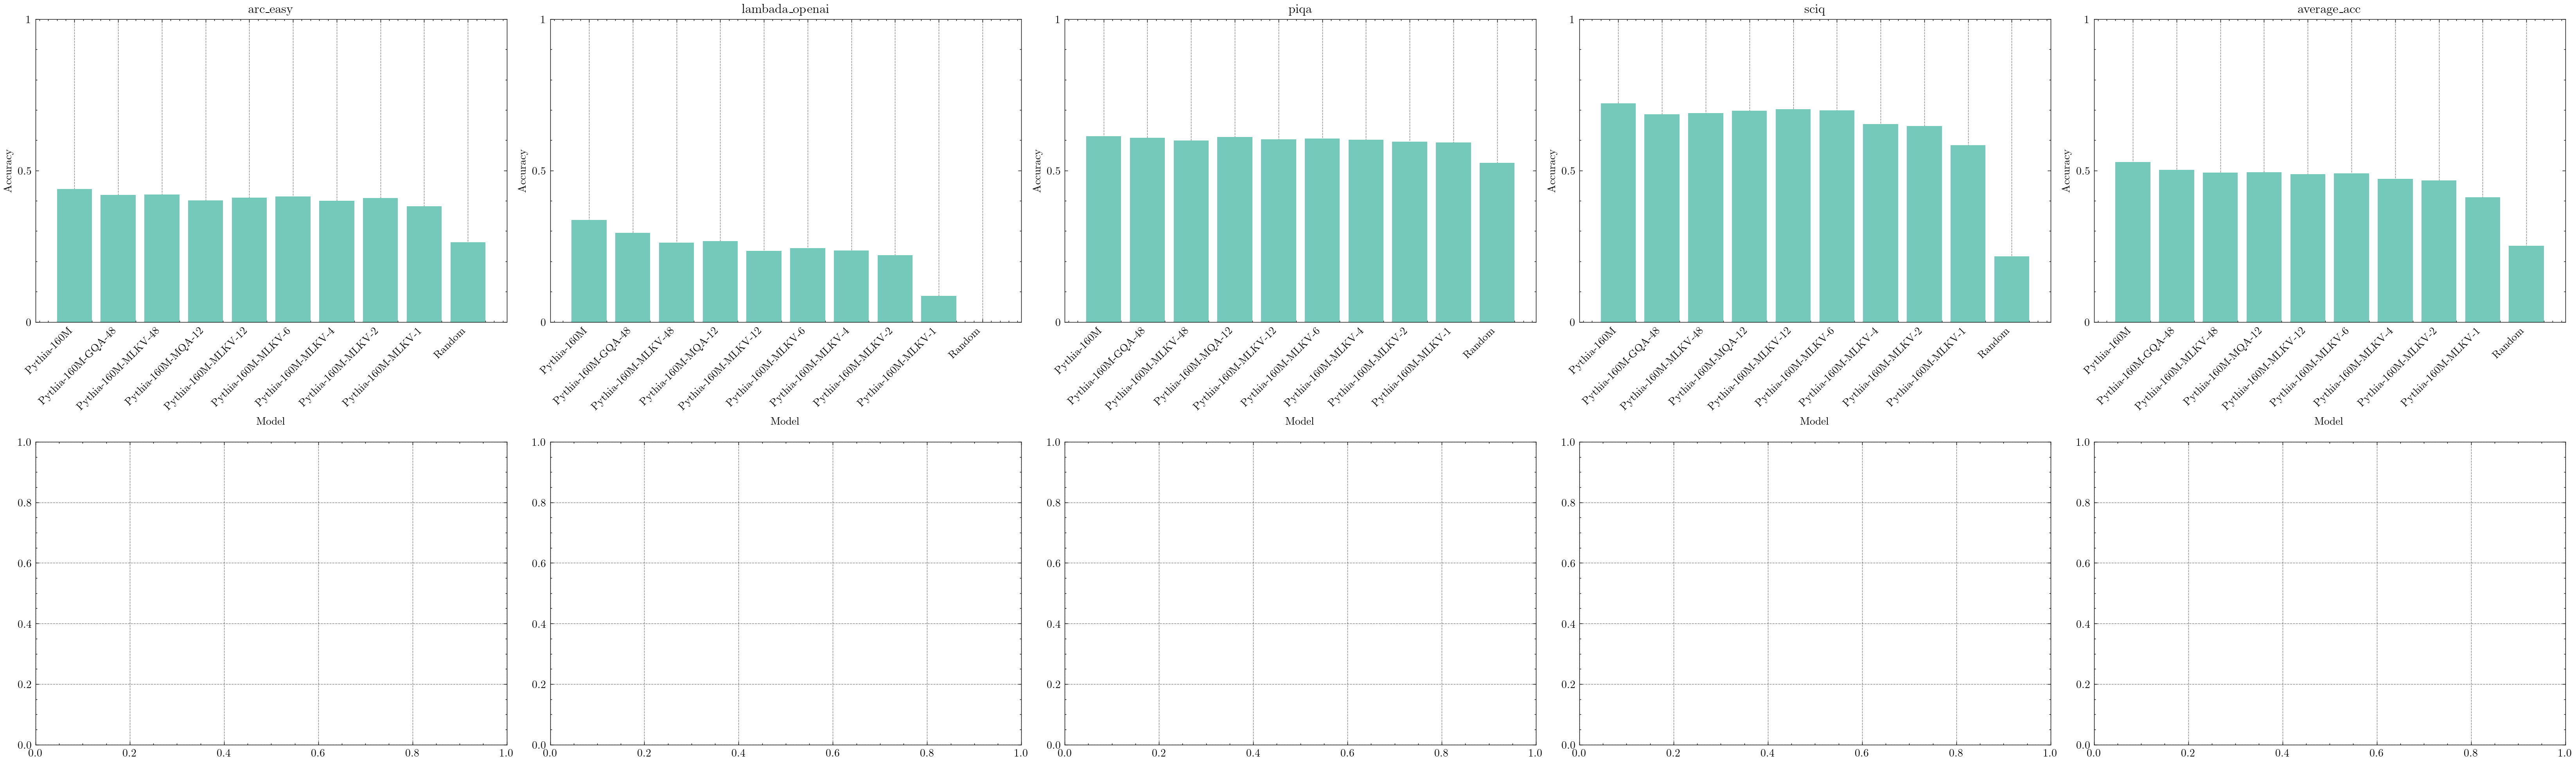

In [45]:
# Plot every benchmark
fig, ax = plt.subplots(2, 5, figsize=(width*5, height*2), dpi=200)
for i, benchmark in enumerate(eval_df.columns[1:]):
    if benchmark != 'wikitext':
        ax[i//5, i%5].bar(eval_df['model'], eval_df[benchmark])
        ax[i//5, i%5].set_title(benchmark)
        ax[i//5, i%5].set_ylim(0, 1)
        ax[i//5, i%5].set_yticks([0, 0.5, 1])
        ax[i//5, i%5].set_yticklabels([0, 0.5, 1])
        ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
        ax[i//5, i%5].grid(axis='y')
        ax[i//5, i%5].set_ylabel("Accuracy")
        ax[i//5, i%5].set_xlabel("Model")
    else:
        ax[i//5, i%5].bar(eval_df['model'], eval_df[benchmark])
        ax[i//5, i%5].set_title(benchmark)
        ax[i//5, i%5].set_xticklabels(eval_df['model'], rotation=45, ha="right")
        ax[i//5, i%5].grid(axis='y')
        ax[i//5, i%5].set_ylabel("Word Perplexity")
        ax[i//5, i%5].set_xlabel("Model")
fig.tight_layout()
# fig.savefig("lm_eval_results.png")
plt.show()

C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\610745214.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//2, i%2].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\610745214.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//2, i%2].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\610745214.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//2, i%2].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\610745214.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//2, i%2].set_xticklabels(eval_df['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\610745214.py:12: UserWarning: FixedFormatter should only be used together with Fix

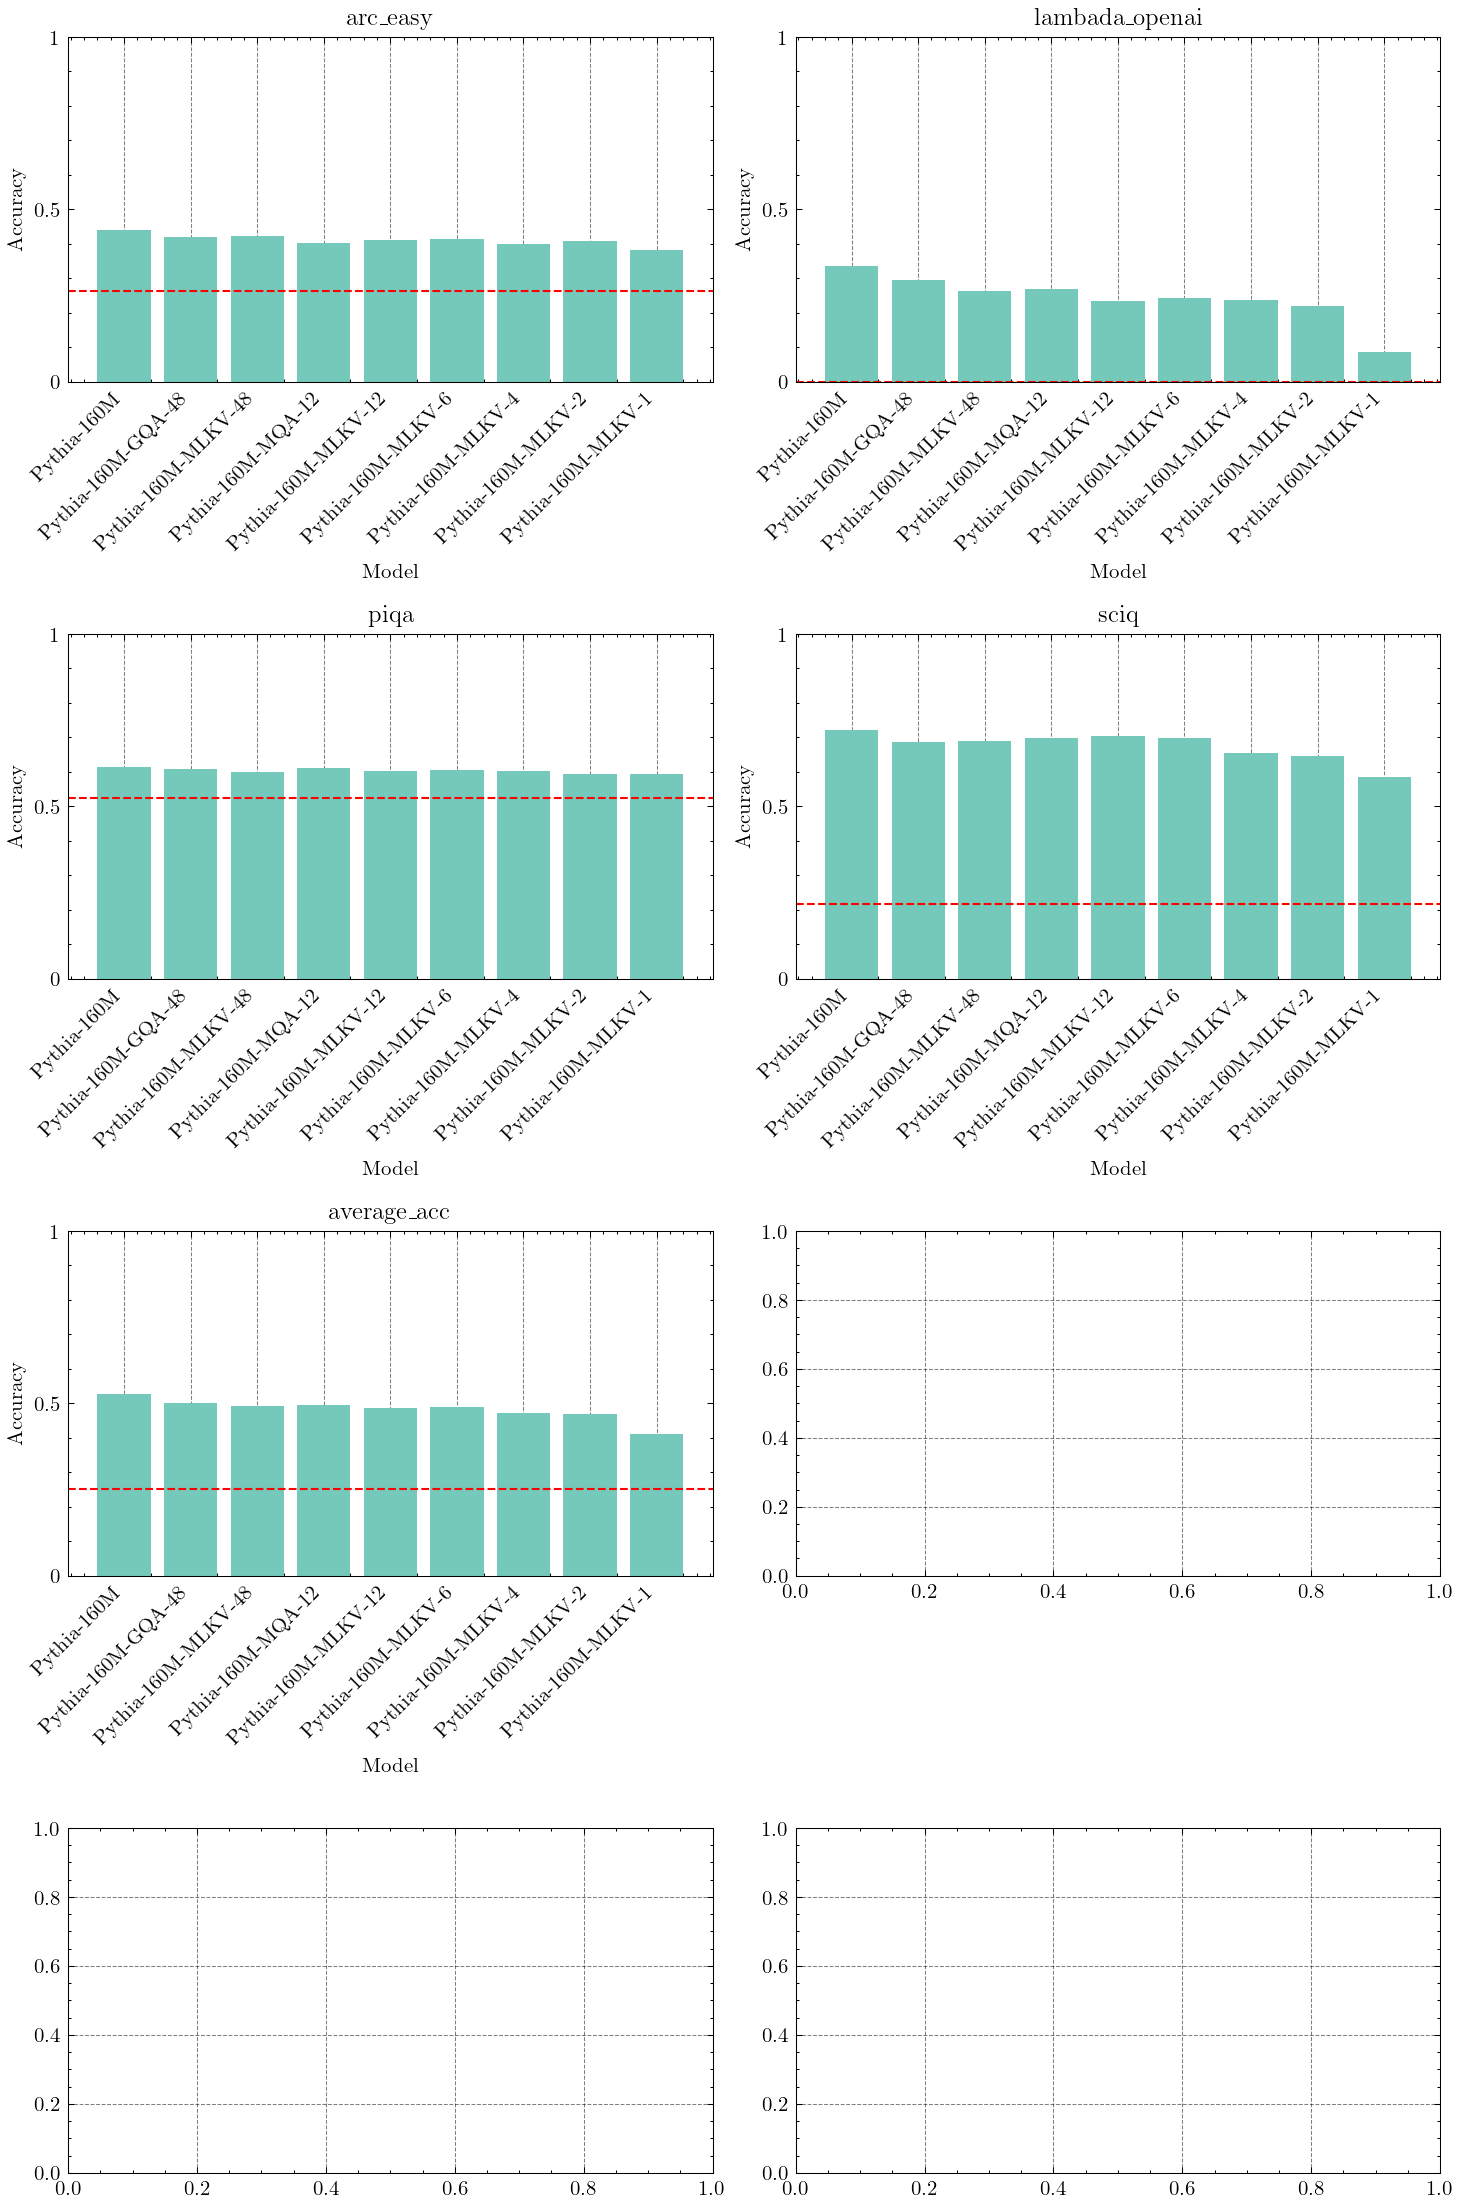

In [46]:
# Plot every benchmark
# Now vertically with 2 columns and 4 rows. Also, skip wikitext
fig, ax = plt.subplots(4, 2, figsize=(width*1.5, height*3), dpi=150)
for i, benchmark in enumerate(eval_df.columns[1:]):
    if i < 8:
        # If model is "Random", then place a horizontal line red line at the score
        ax[i//2, i%2].bar(eval_df[eval_df['model']!='Random']['model'], eval_df[eval_df['model']!='Random'][benchmark])
        ax[i//2, i%2].set_title(benchmark)
        ax[i//2, i%2].set_ylim(0, 1)
        ax[i//2, i%2].set_yticks([0, 0.5, 1])
        ax[i//2, i%2].set_yticklabels([0, 0.5, 1])
        ax[i//2, i%2].set_xticklabels(eval_df['model'], rotation=45, ha="right")
        ax[i//2, i%2].grid(axis='y')
        ax[i//2, i%2].set_ylabel("Accuracy")
        ax[i//2, i%2].set_xlabel("Model")
        # Add horizontal line for Random
        ax[i//2, i%2].axhline(y=eval_df[eval_df['model']=='Random'][benchmark].values[0], color='r', linestyle='--')
        # The x axis names are overlapping with the title of the plot below it
        # add space between plots
    fig.subplots_adjust(hspace=0.7)
fig.tight_layout()
fig.savefig("figs/perfall.pdf")
plt.show()

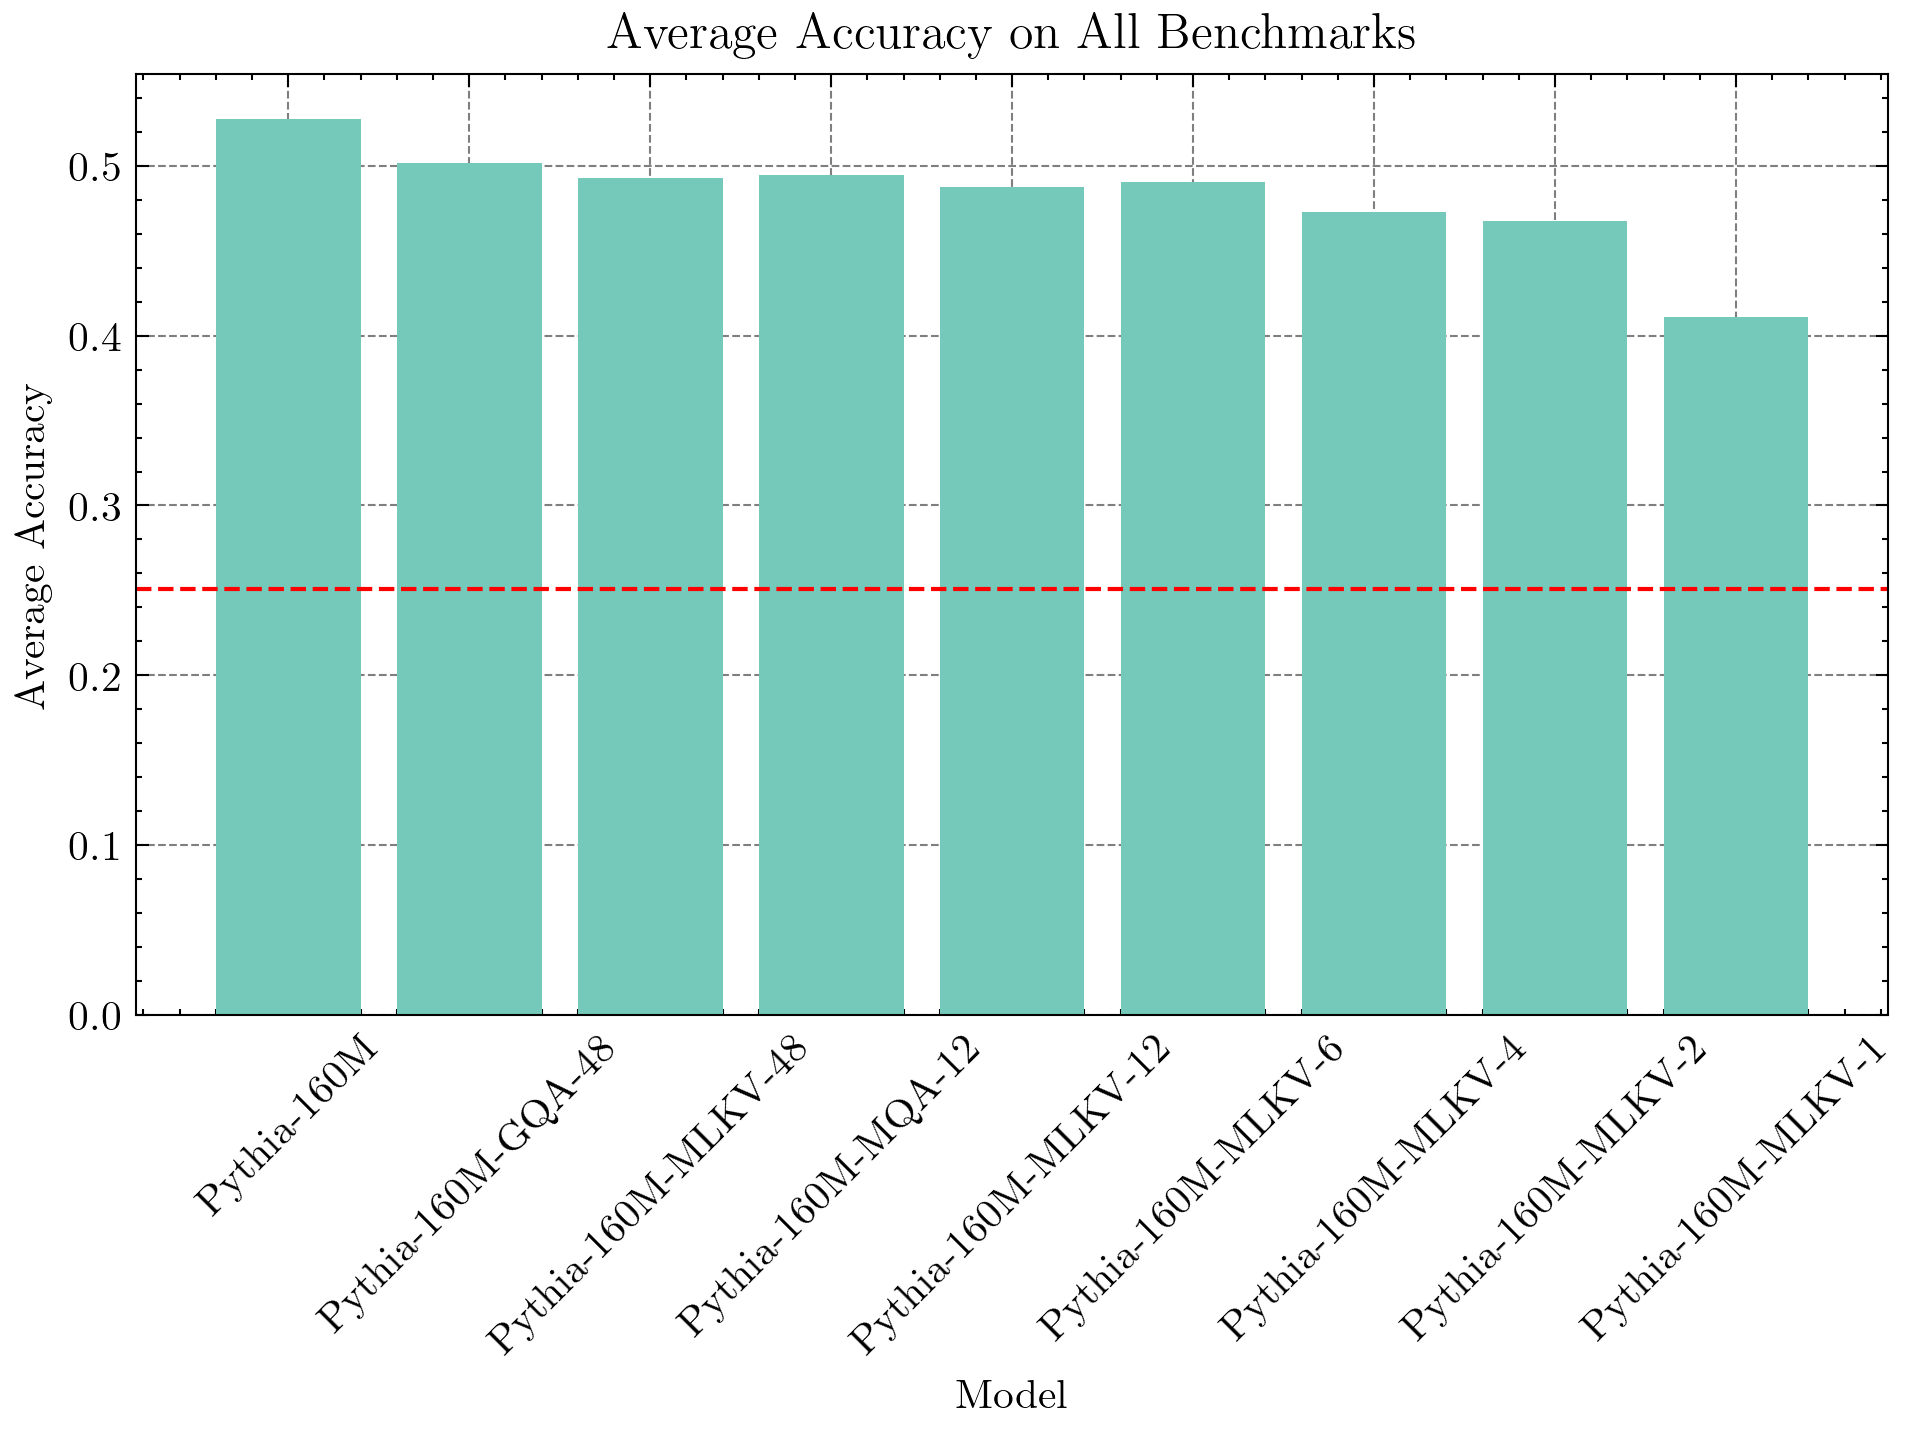

In [47]:
# Plot all accuracies and average accuracy
fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)
ax.bar(eval_df[eval_df['model']!='Random']['model'], eval_df[eval_df['model']!='Random']['average_acc'])
ax.axhline(y=eval_df[eval_df['model']=='Random']['average_acc'].values[0], color='r', linestyle='--')
ax.set_ylabel('Average Accuracy')
ax.set_xlabel('Model')
ax.set_title('Average Accuracy on All Benchmarks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figs/perfavg.jpg')
plt.show()

In [48]:
model_files.pop('Random')

'random_results.json'

In [49]:
# Add data on inference speed and memory measurements
measurements = pd.read_csv('measurements.csv')
measurements

,model_name,batch_size,sequence_length,background_memory_usage,model_memory_usage,memory_usage,kv_cache_mem,inference_time,inference_speed,is_oom
0,../pythia-160m-deduped,8,48,368,831,1762.000000,1151.437500,8.163371,46.059403,False
1,../pythia-160m-deduped,16,48,368,831,3484.893617,2302.875000,10.974431,68.522918,False
2,../pythia-160m-deduped,24,48,368,831,5198.595745,3454.312500,14.151815,79.707091,False
3,../pythia-160m-deduped,32,48,368,831,6439.680851,4605.750000,24.805123,60.632637,False
4,../pythia-160m-deduped,40,48,368,831,6790.893617,5757.187500,59.039050,31.843331,False
...,...,...,...,...,...,...,...,...,...,...
111,faridlazuarda/pythia-160m-mlkv-1-b12-g2-v1,460,48,218,831,726.425532,459.775391,158.002237,136.833506,False
112,faridlazuarda/pythia-160m-mlkv-1-b12-g2-v1,620,48,218,831,960.638298,619.697266,209.431530,139.138553,False
113,faridlazuarda/pythia-160m-mlkv-1-b12-g2-v1,720,48,218,831,1075.148936,719.648438,425.552959,79.520067,False
114,faridlazuarda/pythia-160m-mlkv-1-b12-g2-v1,940,48,218,831,1298.808511,939.541016,1224.736387,36.073069,False


In [50]:
model_name_map = {
    "../pythia-160m-deduped": "Pythia-160M",
    "faridlazuarda/pythia-160m-gqa-48-b12-g2-v2": "Pythia-160M-GQA-48",
    "faridlazuarda/pythia-160m-mlkv-48-b12-g2-v9": "Pythia-160M-MLKV-48",
    "faridlazuarda/pythia-160m-mqa-12-b12-g2-v1": "Pythia-160M-MQA-12",
    "faridlazuarda/pythia-160m-mlkv-12-b12-g2-v1": "Pythia-160M-MLKV-12",
    "faridlazuarda/pythia-160m-mlkv-6-b12-g2-v1": "Pythia-160M-MLKV-6",
    "faridlazuarda/pythia-160m-mlkv-4-b12-g2-v1": "Pythia-160M-MLKV-4",
    "faridlazuarda/pythia-160m-mlkv-2-b12-g2-v1": "Pythia-160M-MLKV-2",
    "faridlazuarda/pythia-160m-mlkv-1-b12-g2-v1": "Pythia-160M-MLKV-1",
}

measurements['model'] = measurements['model_name'].map(model_name_map)

In [51]:
measurements

,model_name,batch_size,sequence_length,background_memory_usage,model_memory_usage,memory_usage,kv_cache_mem,inference_time,inference_speed,is_oom,model
0,../pythia-160m-deduped,8,48,368,831,1762.000000,1151.437500,8.163371,46.059403,False,Pythia-160M
1,../pythia-160m-deduped,16,48,368,831,3484.893617,2302.875000,10.974431,68.522918,False,Pythia-160M
2,../pythia-160m-deduped,24,48,368,831,5198.595745,3454.312500,14.151815,79.707091,False,Pythia-160M
3,../pythia-160m-deduped,32,48,368,831,6439.680851,4605.750000,24.805123,60.632637,False,Pythia-160M
4,../pythia-160m-deduped,40,48,368,831,6790.893617,5757.187500,59.039050,31.843331,False,Pythia-160M
...,...,...,...,...,...,...,...,...,...,...,...
111,faridlazuarda/pythia-160m-mlkv-1-b12-g2-v1,460,48,218,831,726.425532,459.775391,158.002237,136.833506,False,Pythia-160M-MLKV-1
112,faridlazuarda/pythia-160m-mlkv-1-b12-g2-v1,620,48,218,831,960.638298,619.697266,209.431530,139.138553,False,Pythia-160M-MLKV-1
113,faridlazuarda/pythia-160m-mlkv-1-b12-g2-v1,720,48,218,831,1075.148936,719.648438,425.552959,79.520067,False,Pythia-160M-MLKV-1
114,faridlazuarda/pythia-160m-mlkv-1-b12-g2-v1,940,48,218,831,1298.808511,939.541016,1224.736387,36.073069,False,Pythia-160M-MLKV-1


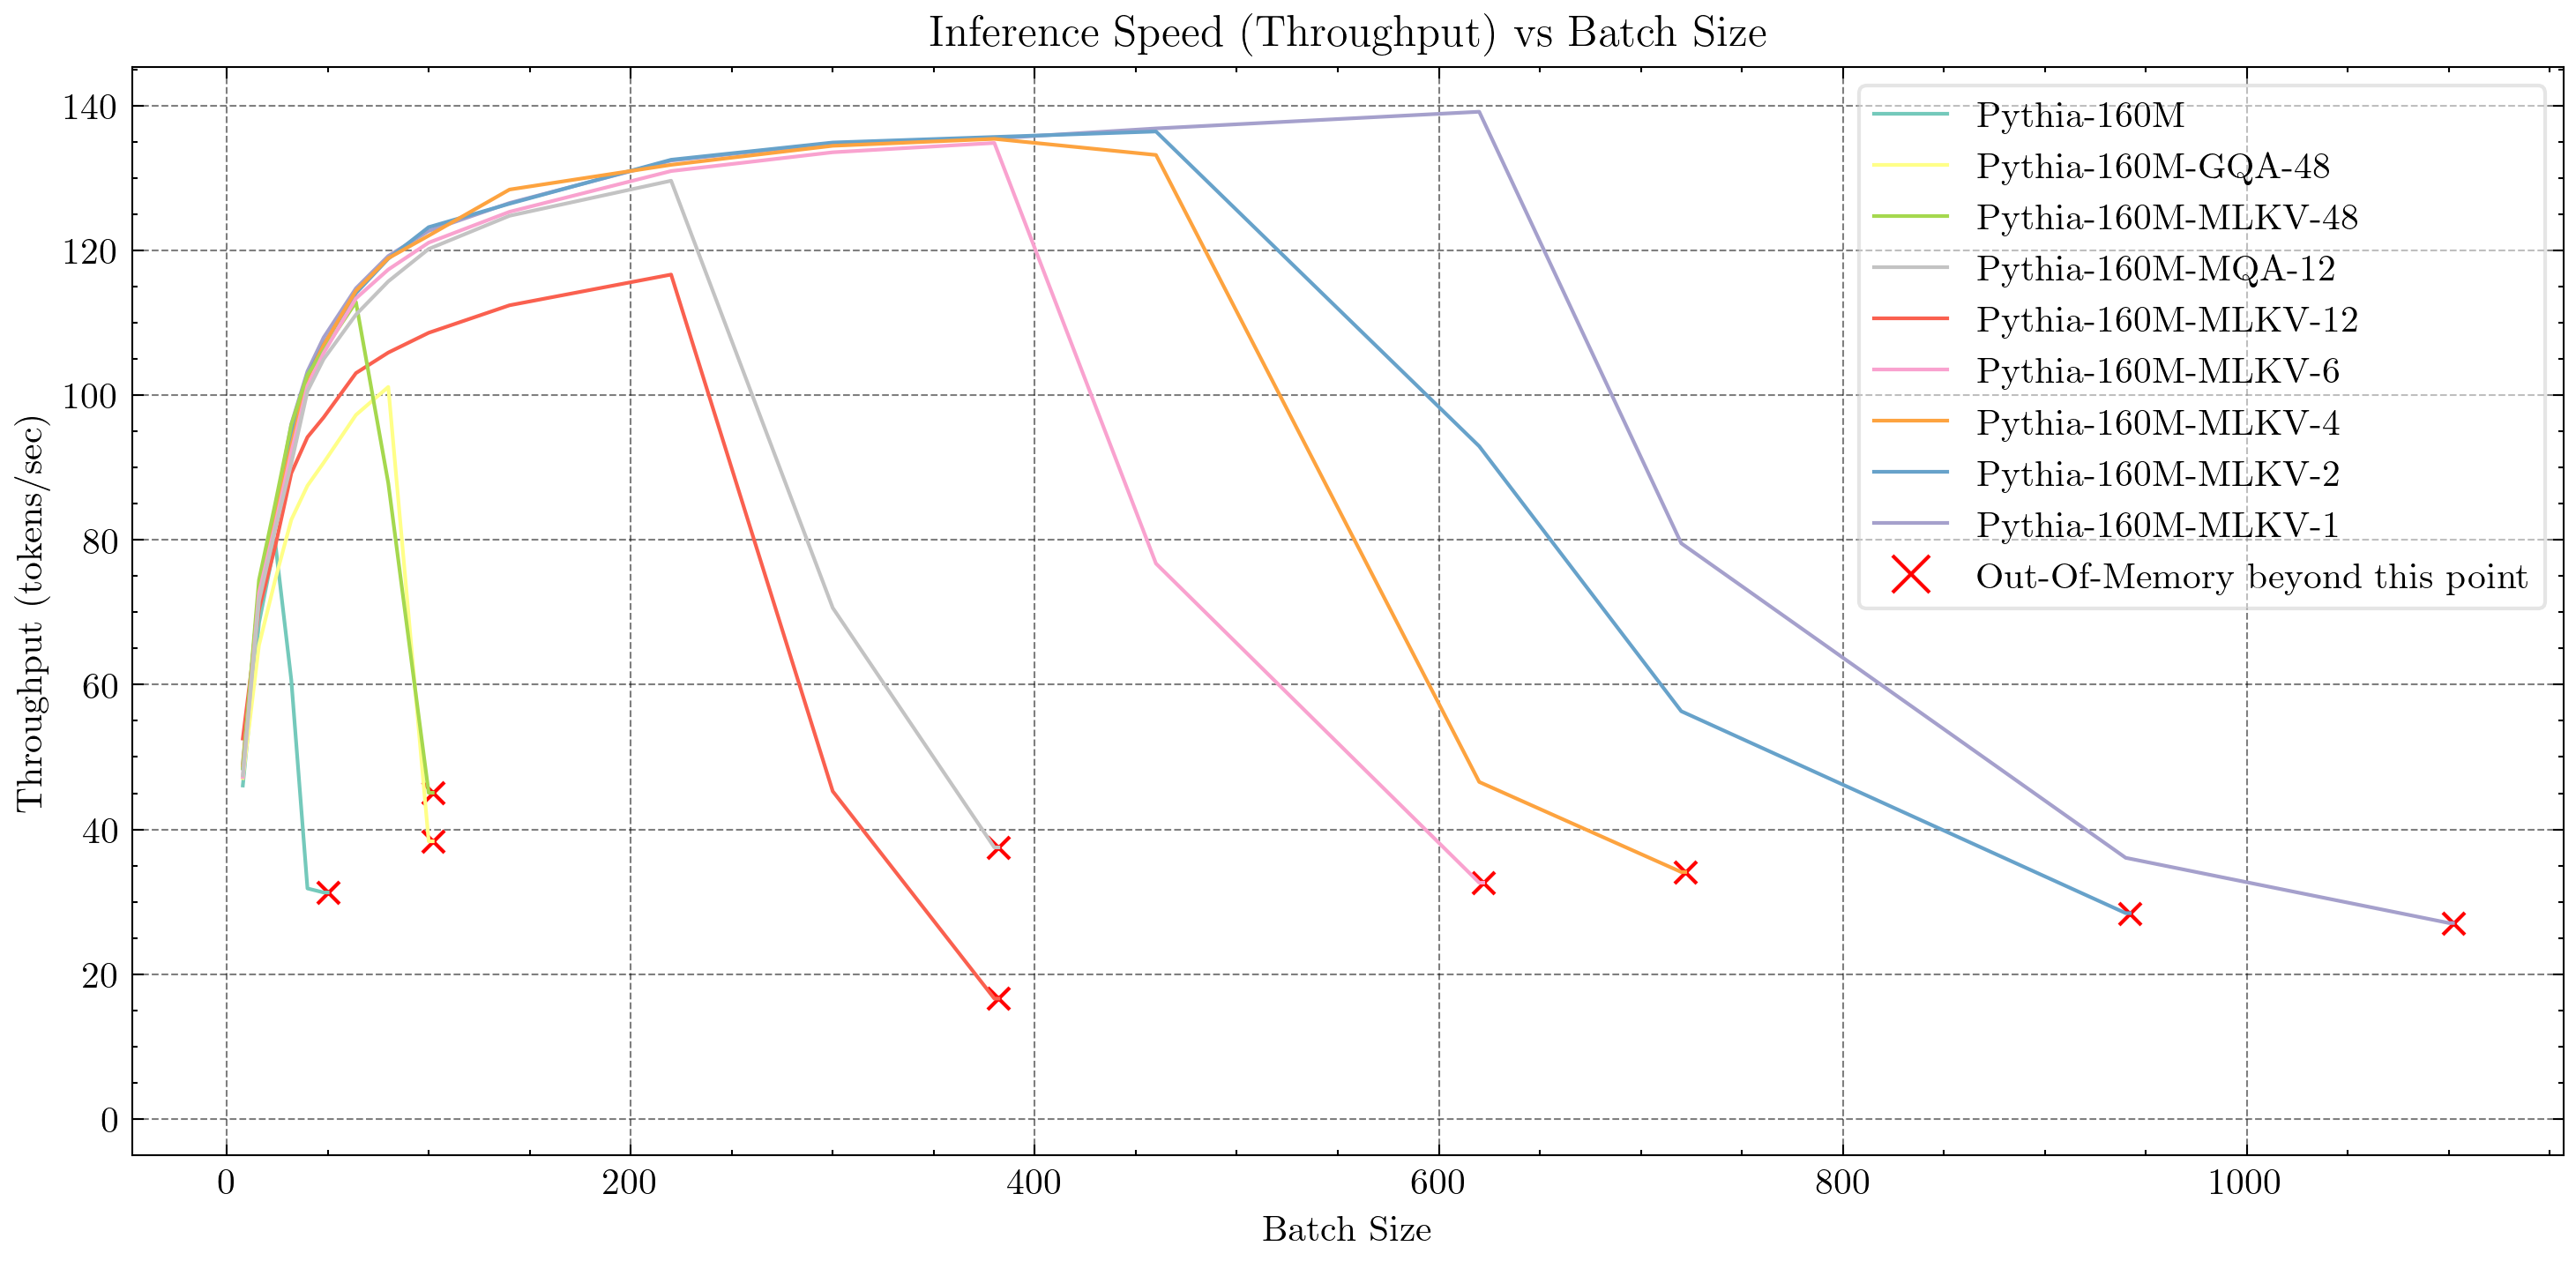

In [52]:
# We want to plot batch size on the x axis and inference speed on the y axis for every model
# We want to plot an "X" at the point where the model runs out of memory, and then stop the line there
# So maybe we need to first remove the OOM points from the data, and then add an imaginary OOM point batch_size + 8 from the last available batch size, with the same inference speed
cleaned_measurements = measurements[measurements['is_oom'] == False]
for model in model_files.keys():
    last_batch_size = cleaned_measurements[cleaned_measurements['model'] == model]['batch_size'].max()
    last_inference_speed = cleaned_measurements[(cleaned_measurements['model'] == model) & (cleaned_measurements['batch_size'] == last_batch_size)]['inference_speed'].values[0]
    last_memory_usage = cleaned_measurements[(cleaned_measurements['model'] == model) & (cleaned_measurements['batch_size'] == last_batch_size)]['memory_usage'].values[0]
    cleaned_measurements = pd.concat([cleaned_measurements, pd.DataFrame({'model': [model], 'batch_size': [last_batch_size + 2], 'memory_usage':[last_memory_usage], 'inference_speed': [last_inference_speed], 'is_oom': [True]})])

fig, ax = plt.subplots(figsize=(width*1.5, height), dpi=dpi)
for model, group in cleaned_measurements.groupby('model'):
    group.plot(x='batch_size', y='inference_speed', kind='line', ax=ax, label=model)
    for i, row in group.iterrows():
        if row['is_oom']:
            ax.scatter(row['batch_size'], row['inference_speed'], color='red', marker='x')
# Axes should start from 0
ax.set_ylim(bottom=-5)
# Sort legends like in model_files
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: list(model_files.keys()).index(t[0])))
# Add X mark for OOM as legend
handles = list(handles) + [plt.Line2D([0], [0], color='red', marker='x', linestyle='None', markersize=10)]
labels = list(labels) + ['Out-Of-Memory beyond this point']
ax.legend(handles, labels, framealpha=0.5)
ax.set_ylabel('Throughput (tokens/sec)')
ax.set_xlabel('Batch Size')
ax.set_title('Inference Speed (Throughput) vs Batch Size')
plt.tight_layout()
plt.savefig('figs/speedvsbatch.jpg')
plt.show()

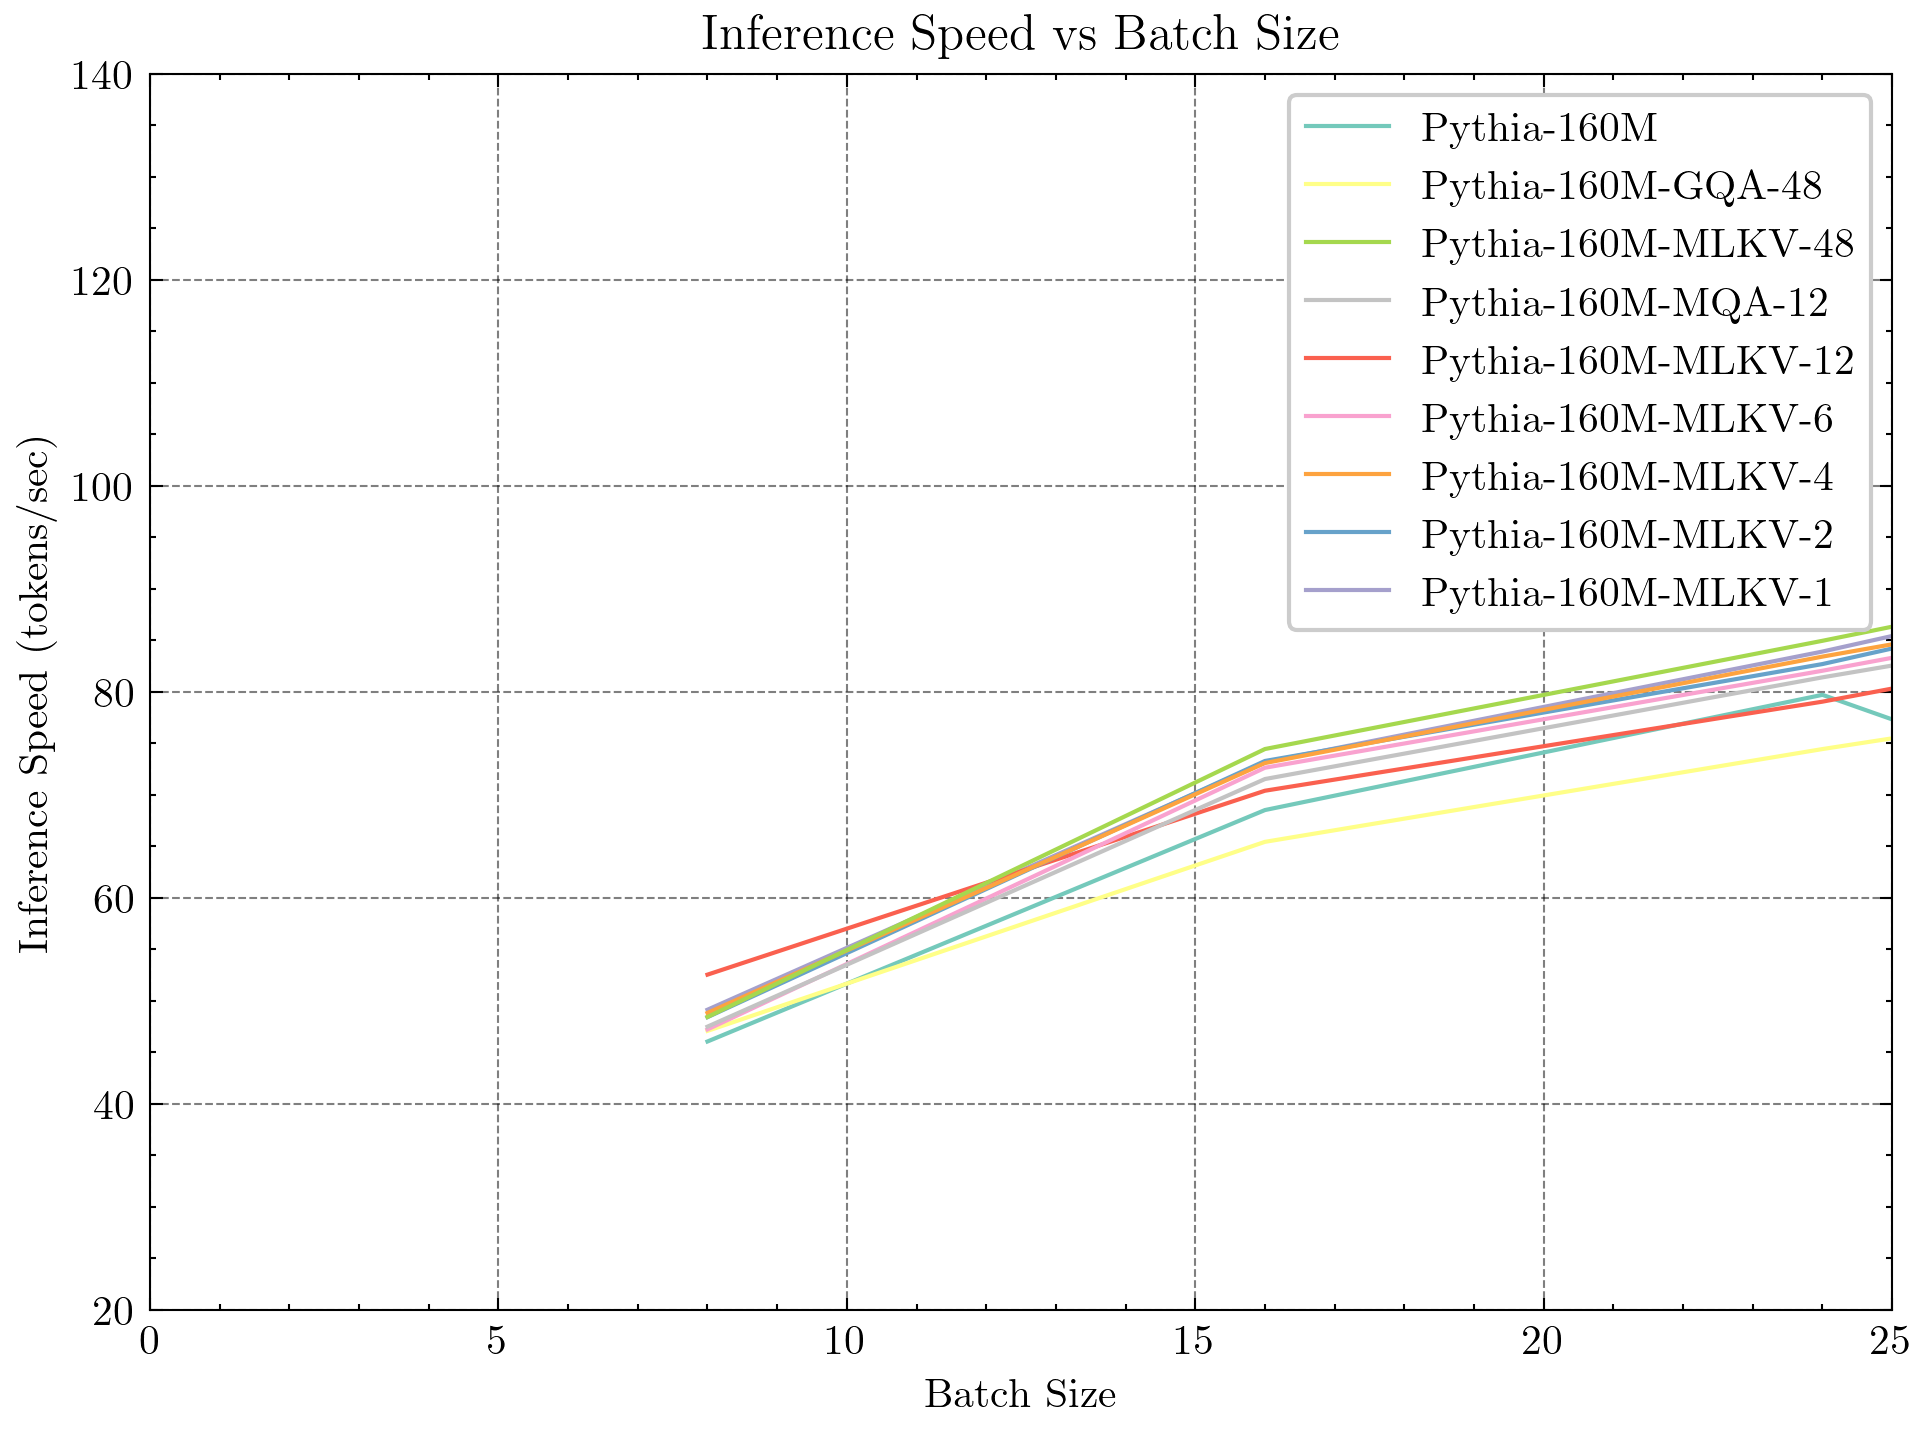

In [53]:
fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)
for model, group in cleaned_measurements.groupby('model'):
    group.plot(x='batch_size', y='inference_speed', kind='line', ax=ax, label=model)
    for i, row in group.iterrows():
        if row['is_oom']:
            ax.scatter(row['batch_size'], row['inference_speed'], color='red', marker='x')
# Axes should start from 0
ax.set_ylim(20, 140)
ax.set_xlim(0, 25)
# Sort legends like in model_files
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: list(model_files.keys()).index(t[0])))
ax.legend(handles, labels)
ax.set_ylabel('Inference Speed (tokens/sec)')
ax.set_xlabel('Batch Size')
ax.set_title('Inference Speed vs Batch Size')
plt.tight_layout()
# plt.savefig('')
plt.show()

C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\4147113591.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(batch_group['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\4147113591.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(batch_group['model'], rotation=45, ha="right")
C:\Users\zaydz\AppData\Local\Temp\ipykernel_19488\4147113591.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(batch_group['model'], rotation=45, ha="right")


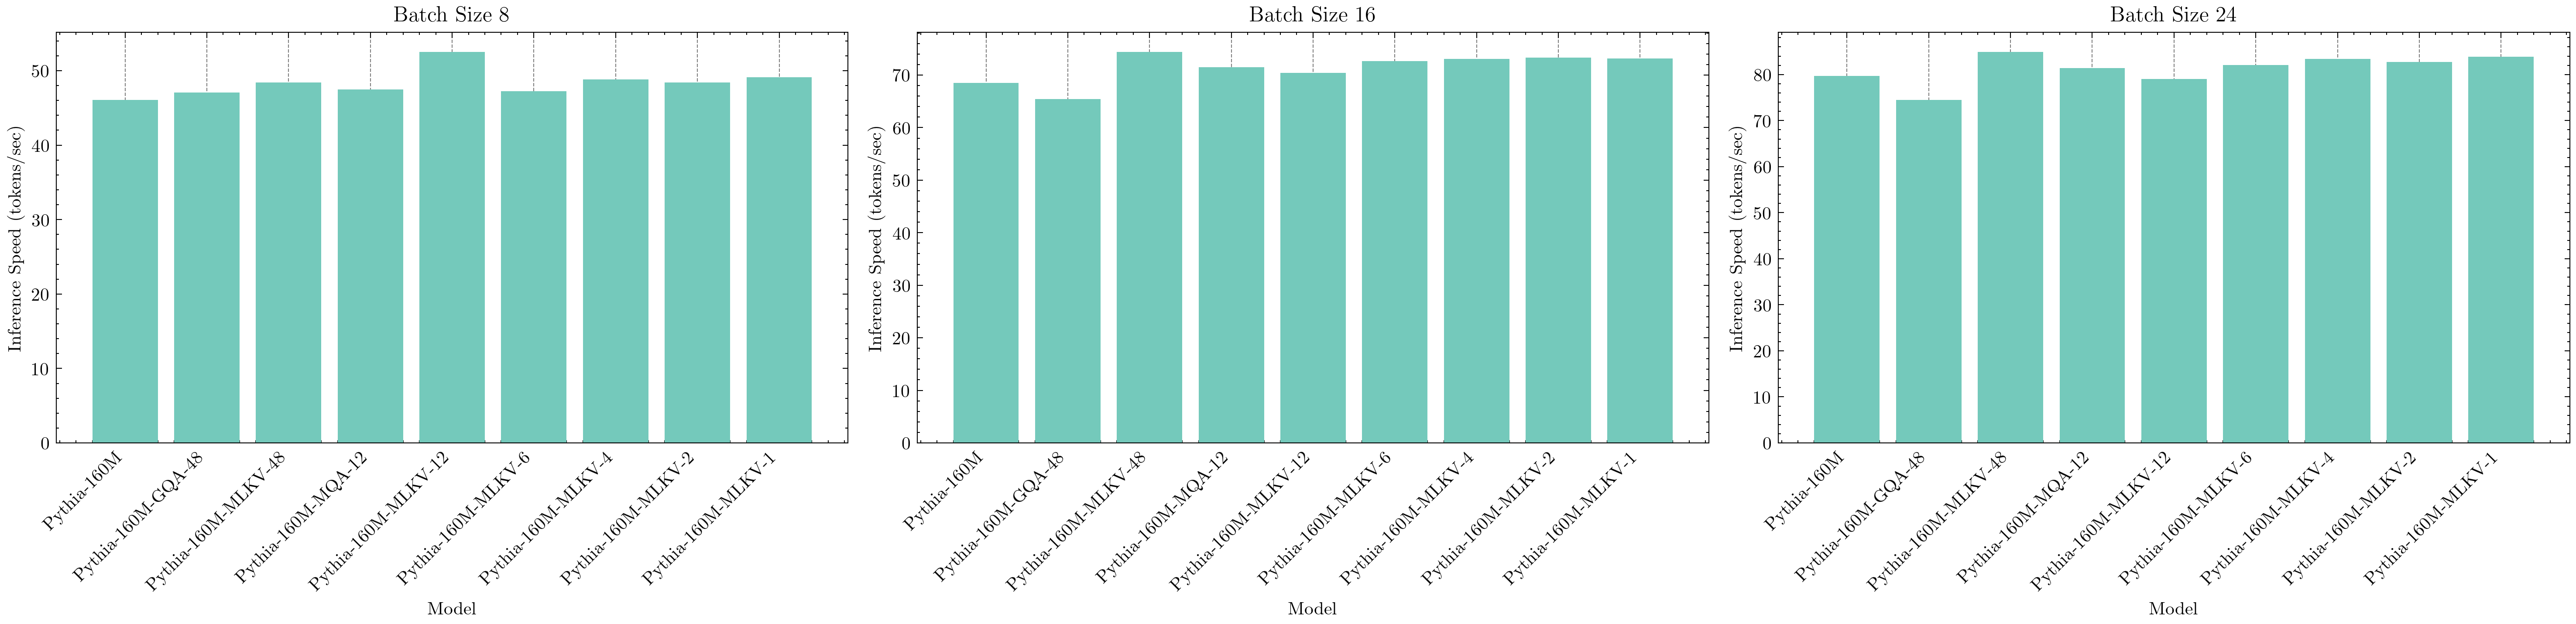

In [54]:
# Compare inference speed with bar plots for batch sizes 8, 16, and 24
# Do 3 subplots for each batch size
batch_sizes = [8, 16, 24]
fig, ax = plt.subplots(1, 3, figsize=(width*3, height), dpi=dpi)
for i, batch_size in enumerate(batch_sizes):
    batch_group = cleaned_measurements[cleaned_measurements['batch_size'] == batch_size]
    ax[i].bar(batch_group['model'], batch_group['inference_speed'])
    ax[i].set_title(f'Batch Size {batch_size}')
    ax[i].set_ylabel('Inference Speed (tokens/sec)')
    ax[i].set_xlabel('Model')
    ax[i].set_xticklabels(batch_group['model'], rotation=45, ha="right")
    ax[i].grid(axis='y')
fig.tight_layout()
# plt.savefig('figs/speedvsbatchbar.jpg')
plt.show()

model
Pythia-160M            46.059403
Pythia-160M-GQA-48     47.088135
Pythia-160M-MLKV-48    48.440968
Pythia-160M-MQA-12     47.500808
Pythia-160M-MLKV-12    52.548052
Pythia-160M-MLKV-6     47.232510
Pythia-160M-MLKV-4     48.831356
Pythia-160M-MLKV-2     48.423756
Pythia-160M-MLKV-1     49.143552
Name: inference_speed, dtype: float64


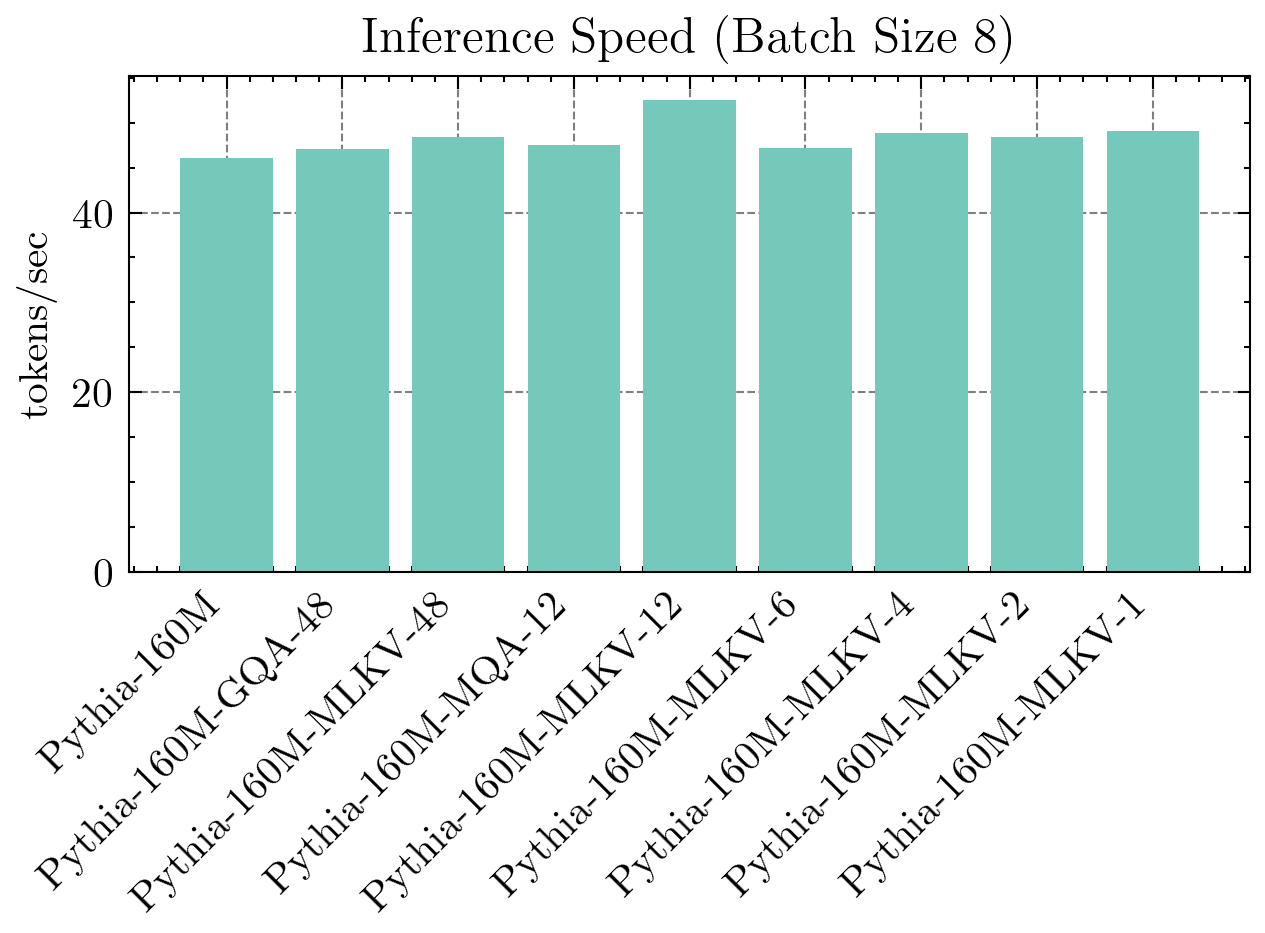

In [82]:
# Plot tokens/sec for batch size 8 (just use inference speed)
fig, ax = plt.subplots(figsize=(width/1.5, height/1.5), dpi=dpi)
inference_speed_8 = cleaned_measurements[cleaned_measurements['batch_size'] == 8].groupby('model')['inference_speed'].mean()
inference_speed_8 = inference_speed_8.reindex(list(model_files.keys()))
print(inference_speed_8)
ax.bar(inference_speed_8.index, inference_speed_8)
ax.set_ylabel('tokens/sec')
# ax.set_xlabel('Model')
ax.set_title('Inference Speed (Batch Size 8)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('figs/speed8.png')
plt.show()


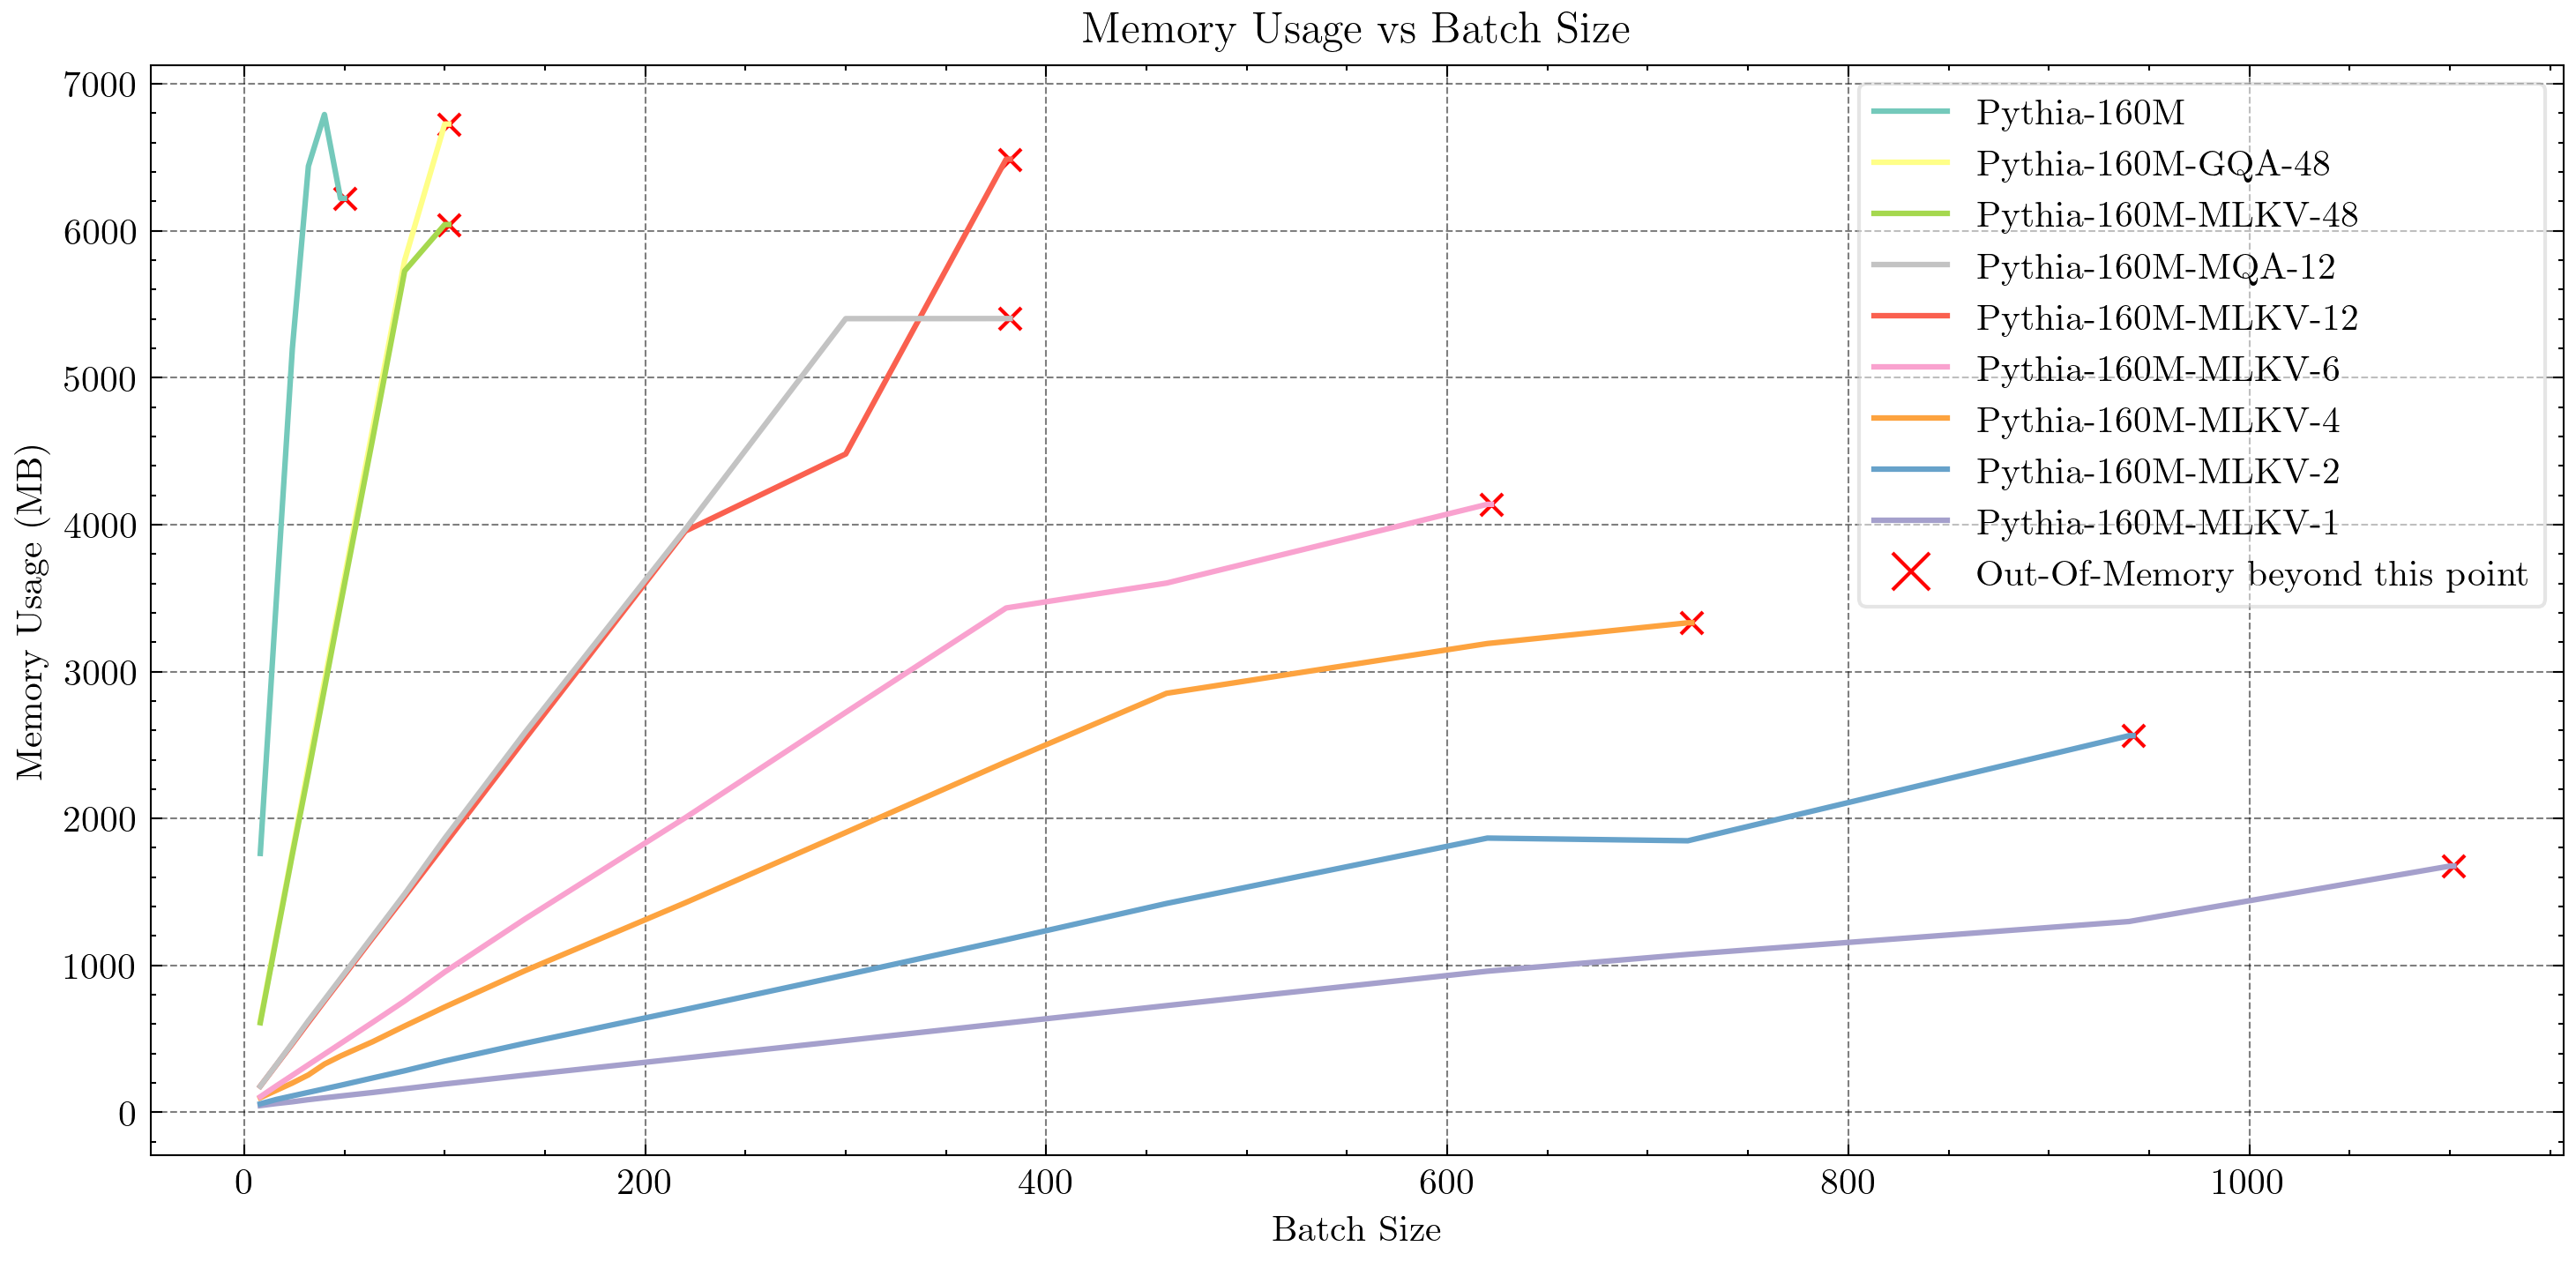

In [81]:
# Make the same graph but mem_usage instead of inference_speed
fig, ax = plt.subplots(figsize=(width*1.5, height), dpi=dpi)
for model, group in cleaned_measurements.groupby('model'):
    group.plot(x='batch_size', y='memory_usage', kind='line', ax=ax, label=model, linewidth=1.5)
    for i, row in group.iterrows():
        if row['is_oom']:
            ax.scatter(row['batch_size'], row['memory_usage'], color='red', marker='x')
# Sort legends like in model_files
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: list(model_files.keys()).index(t[0])))
handles = list(handles) + [plt.Line2D([0], [0], color='red', marker='x', linestyle='None', markersize=10)]
labels = list(labels) + ['Out-Of-Memory beyond this point']
ax.legend(handles, labels, framealpha=0.5)
ax.set_ylabel('Memory Usage (MB)')
ax.set_xlabel('Batch Size')
ax.set_title('Memory Usage vs Batch Size')
plt.tight_layout()
plt.savefig('figs/memoryvsbatch.png')
plt.show()

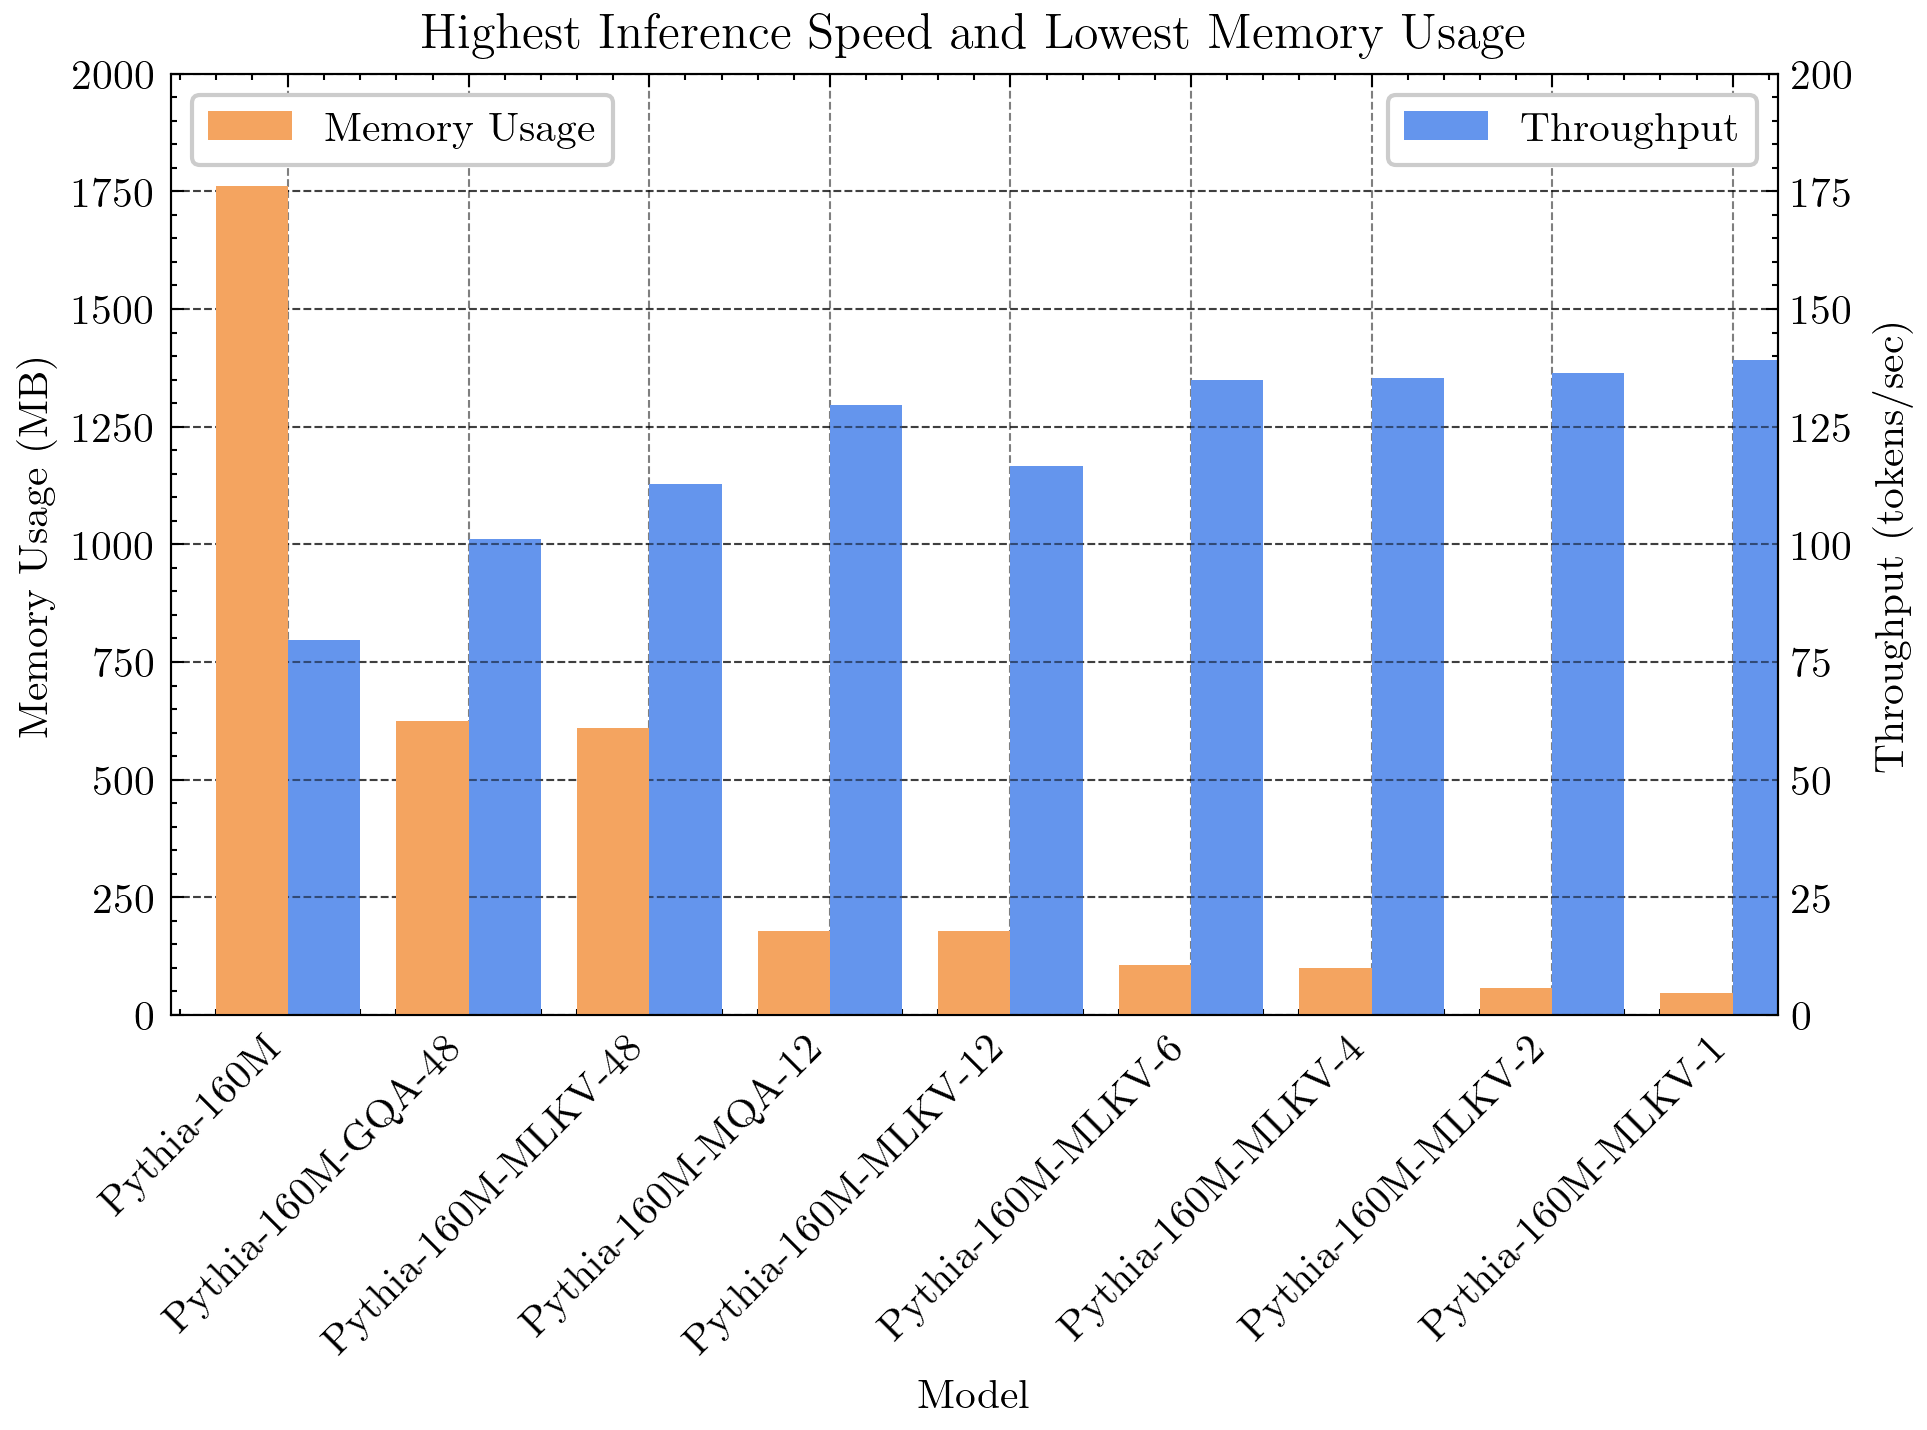

In [61]:
# Plot highest inference speed and lowest memory usage of all models in bar chart. For each model, one bar for inference speed and one for memory usage side-by-side, in the same plot, so 2 y-axes
# Also order the models like in model_files
fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)
inference_speeds = cleaned_measurements.groupby('model')['inference_speed'].max()
memory_usages = cleaned_measurements.groupby('model')['memory_usage'].min()
inference_speeds = inference_speeds[list(model_files.keys())]
memory_usages = memory_usages[list(model_files.keys())]
inference_speeds.plot(kind='bar', ax=ax, color='cornflowerblue', position=0, width=0.4, label='Throughput')
ax.set_ylabel('Throughput (tokens/sec)')
ax.set_xlabel('Model')
ax.set_title('Highest Inference Speed and Lowest Memory Usage')
ax2 = ax.twinx()
memory_usages.plot(kind='bar', ax=ax2, color='sandybrown', position=1, width=0.4, label='Memory Usage', )
ax2.set_ylabel('Memory Usage (MB)')
# Align the y-axis scales so that the grid isn't misaligned
ax2.set_ylim(0, 2000)
ax.set_ylim(0, 200)
# Set legends
ax.legend(loc='upper right')
ax2.legend(loc='upper left')
# Switch the axis the legend is on
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_left()
# Set the model names 45 degrees rotated
ax.set_xticklabels(list(model_files.keys()), rotation=45, ha="right")
plt.tight_layout()
plt.savefig('figs/speedandmem.jpg')
plt.show()

In [62]:
cleaned_measurements.groupby('model')['inference_speed'].max()

model
Pythia-160M             79.707091
Pythia-160M-GQA-48     101.122849
Pythia-160M-MLKV-1     139.138553
Pythia-160M-MLKV-12    116.646057
Pythia-160M-MLKV-2     136.413041
Pythia-160M-MLKV-4     135.393649
Pythia-160M-MLKV-48    112.842166
Pythia-160M-MLKV-6     134.827592
Pythia-160M-MQA-12     129.611148
Name: inference_speed, dtype: float64

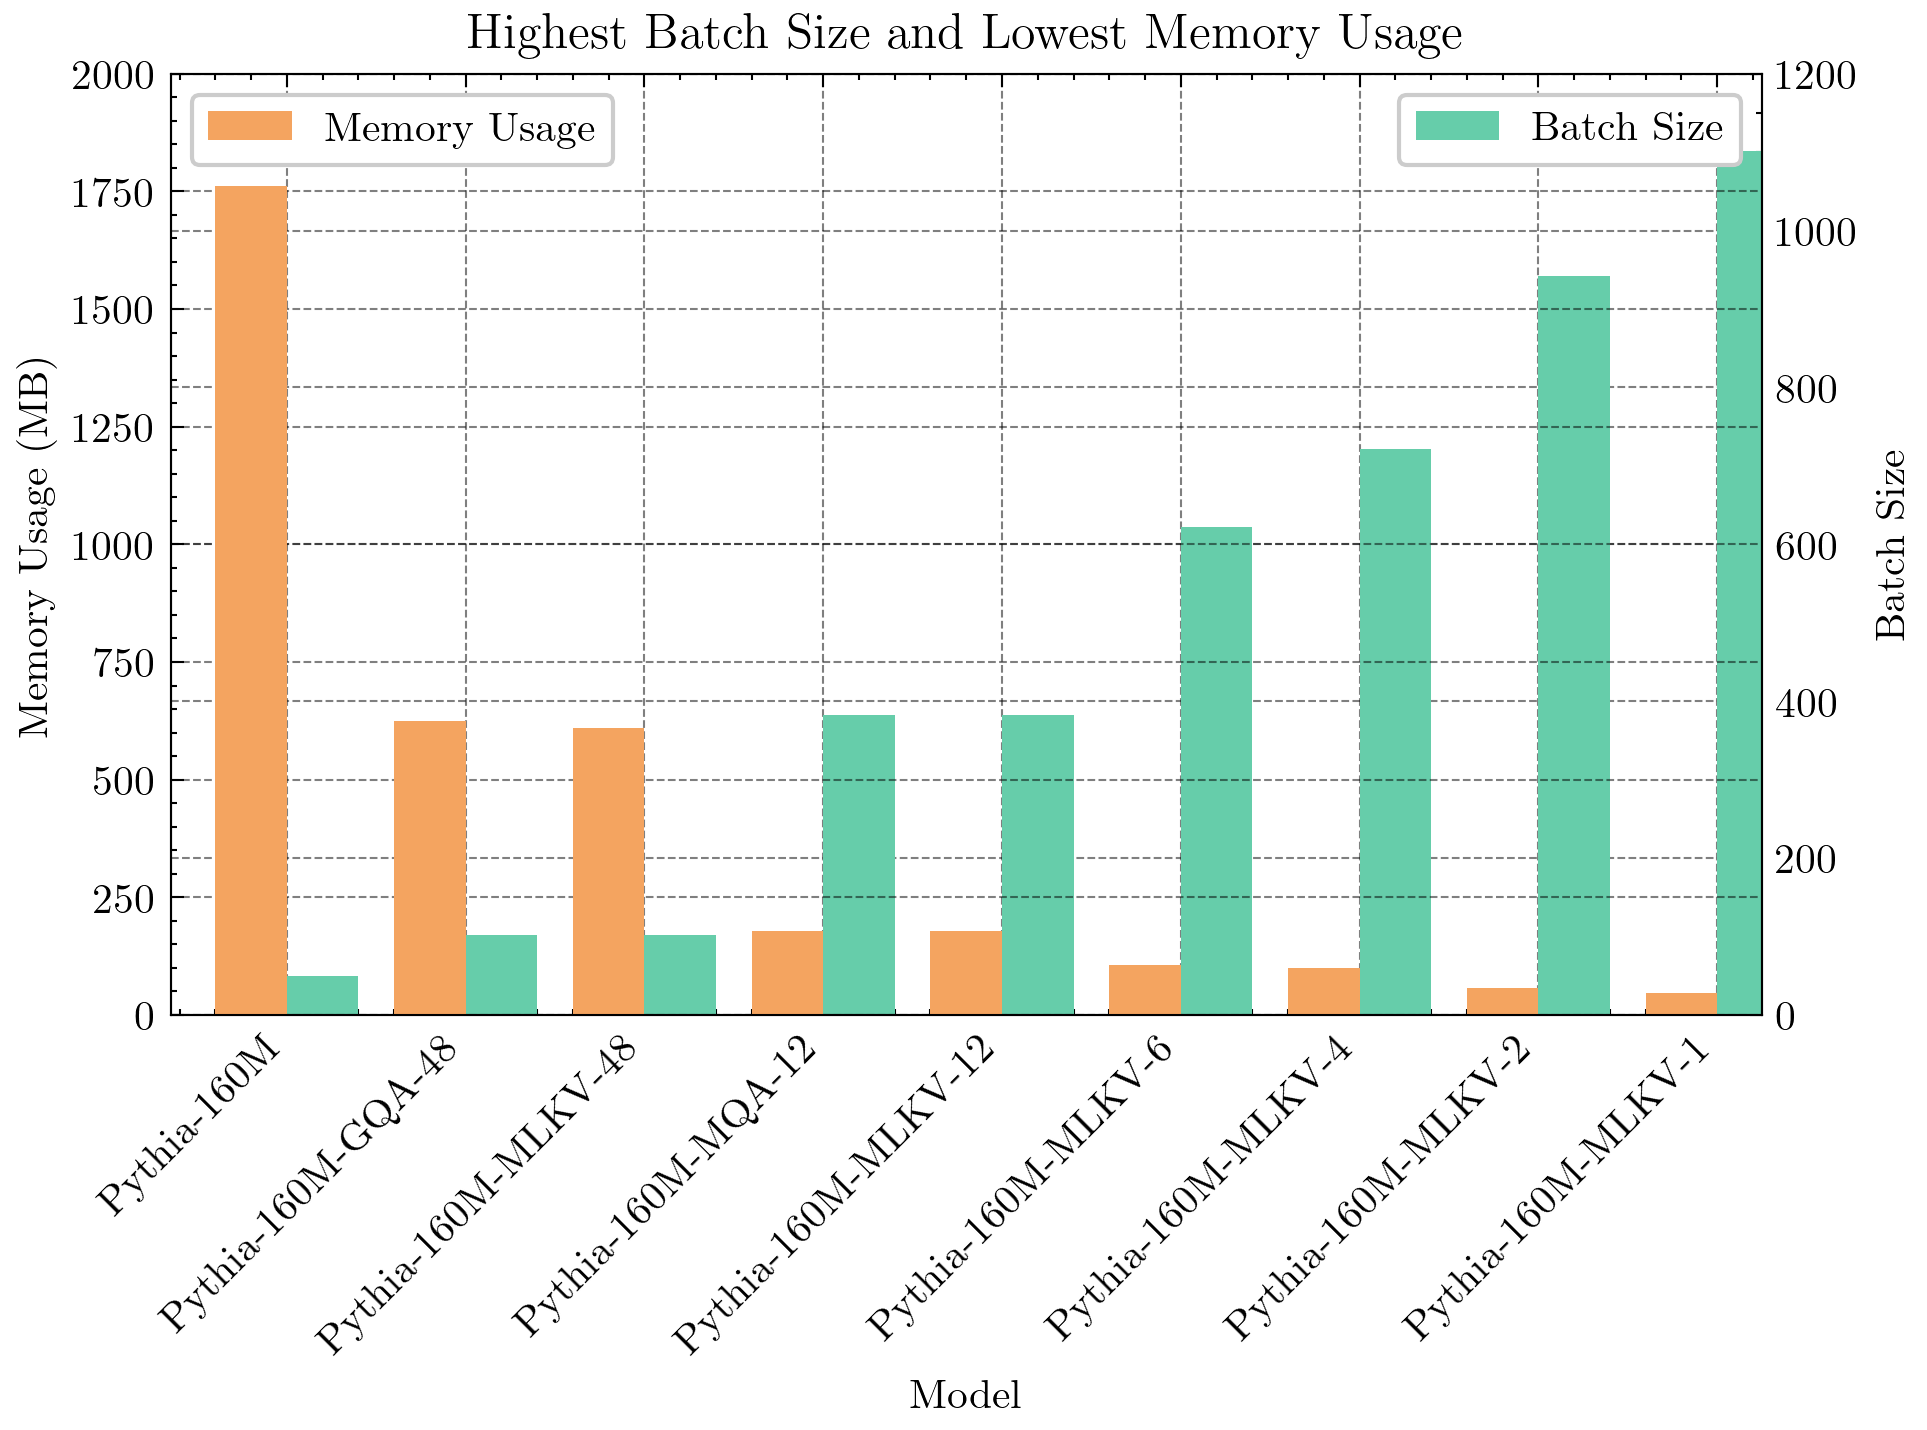

In [63]:
# Plot highest batch size and lowest memory usage of all models in bar chart. For each model, one bar for inference speed and one for memory usage side-by-side, in the same plot, so 2 y-axes
# Also order the models like in model_files
fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)
batch_sizes = cleaned_measurements.groupby('model')['batch_size'].max()
memory_usages = cleaned_measurements.groupby('model')['memory_usage'].min()
batch_sizes = batch_sizes[list(model_files.keys())]
memory_usages = memory_usages[list(model_files.keys())]
batch_sizes.plot(kind='bar', ax=ax, color='mediumaquamarine', position=0, width=0.4, label='Batch Size')
ax.set_ylabel('Batch Size')
ax.set_xlabel('Model')
ax.set_title('Highest Batch Size and Lowest Memory Usage')
ax2 = ax.twinx()
memory_usages.plot(kind='bar', ax=ax2, color='sandybrown', position=1, width=0.4, label='Memory Usage', )
ax2.set_ylabel('Memory Usage (MB)')
# Align the y-axis scales so that the grid isn't misaligned
ax2.set_ylim(0, 2000)
ax.set_ylim(0, 1200)
# Set legends
ax.legend(loc='upper right')
ax2.legend(loc='upper left')
# Switch the axis the legend is on
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_left()
# Set the model names 45 degrees rotated
ax.set_xticklabels(list(model_files.keys()), rotation=45, ha="right")
plt.tight_layout()
plt.savefig('figs/batchandmem.jpg')
plt.show()

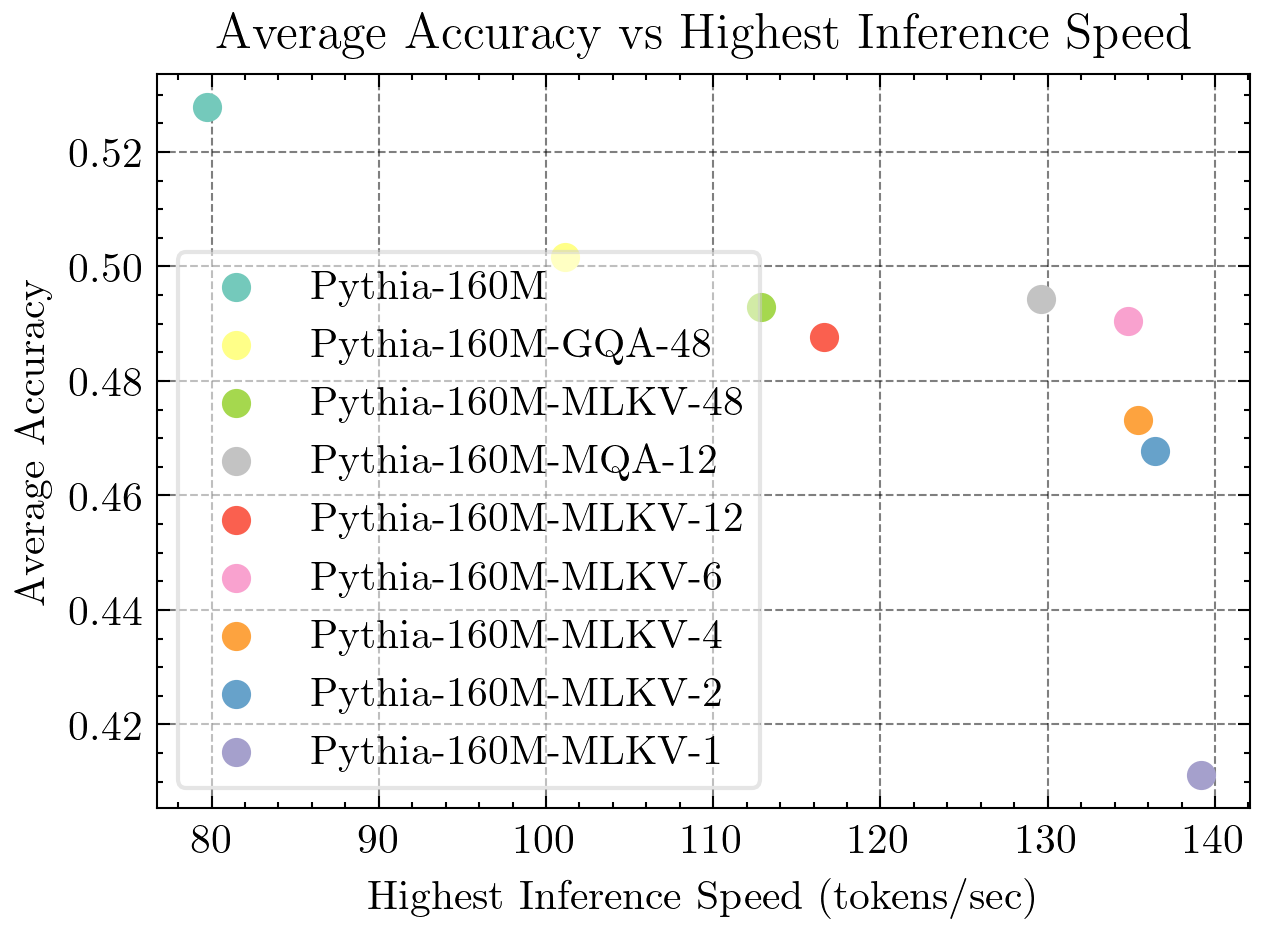

In [64]:
# Plot highest inference speed on x axis vs average accuracy on y axis
fig, ax = plt.subplots(figsize=(width/1.5, height/1.5), dpi=dpi)
for model, group in cleaned_measurements.groupby('model'):
    max_speed = group['inference_speed'].max()
    acc = eval_df[eval_df['model'] == model]['average_acc'].values[0]
    ax.scatter(max_speed, acc, label=model)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: list(model_files.keys()).index(t[0])))
ax.legend(handles, labels, framealpha=0.5)
ax.set_ylabel('Average Accuracy')
ax.set_xlabel('Highest Inference Speed (tokens/sec)')
ax.set_title('Average Accuracy vs Highest Inference Speed')
plt.tight_layout()
# plt.savefig('accuracy_vs_speed.png')
plt.show()

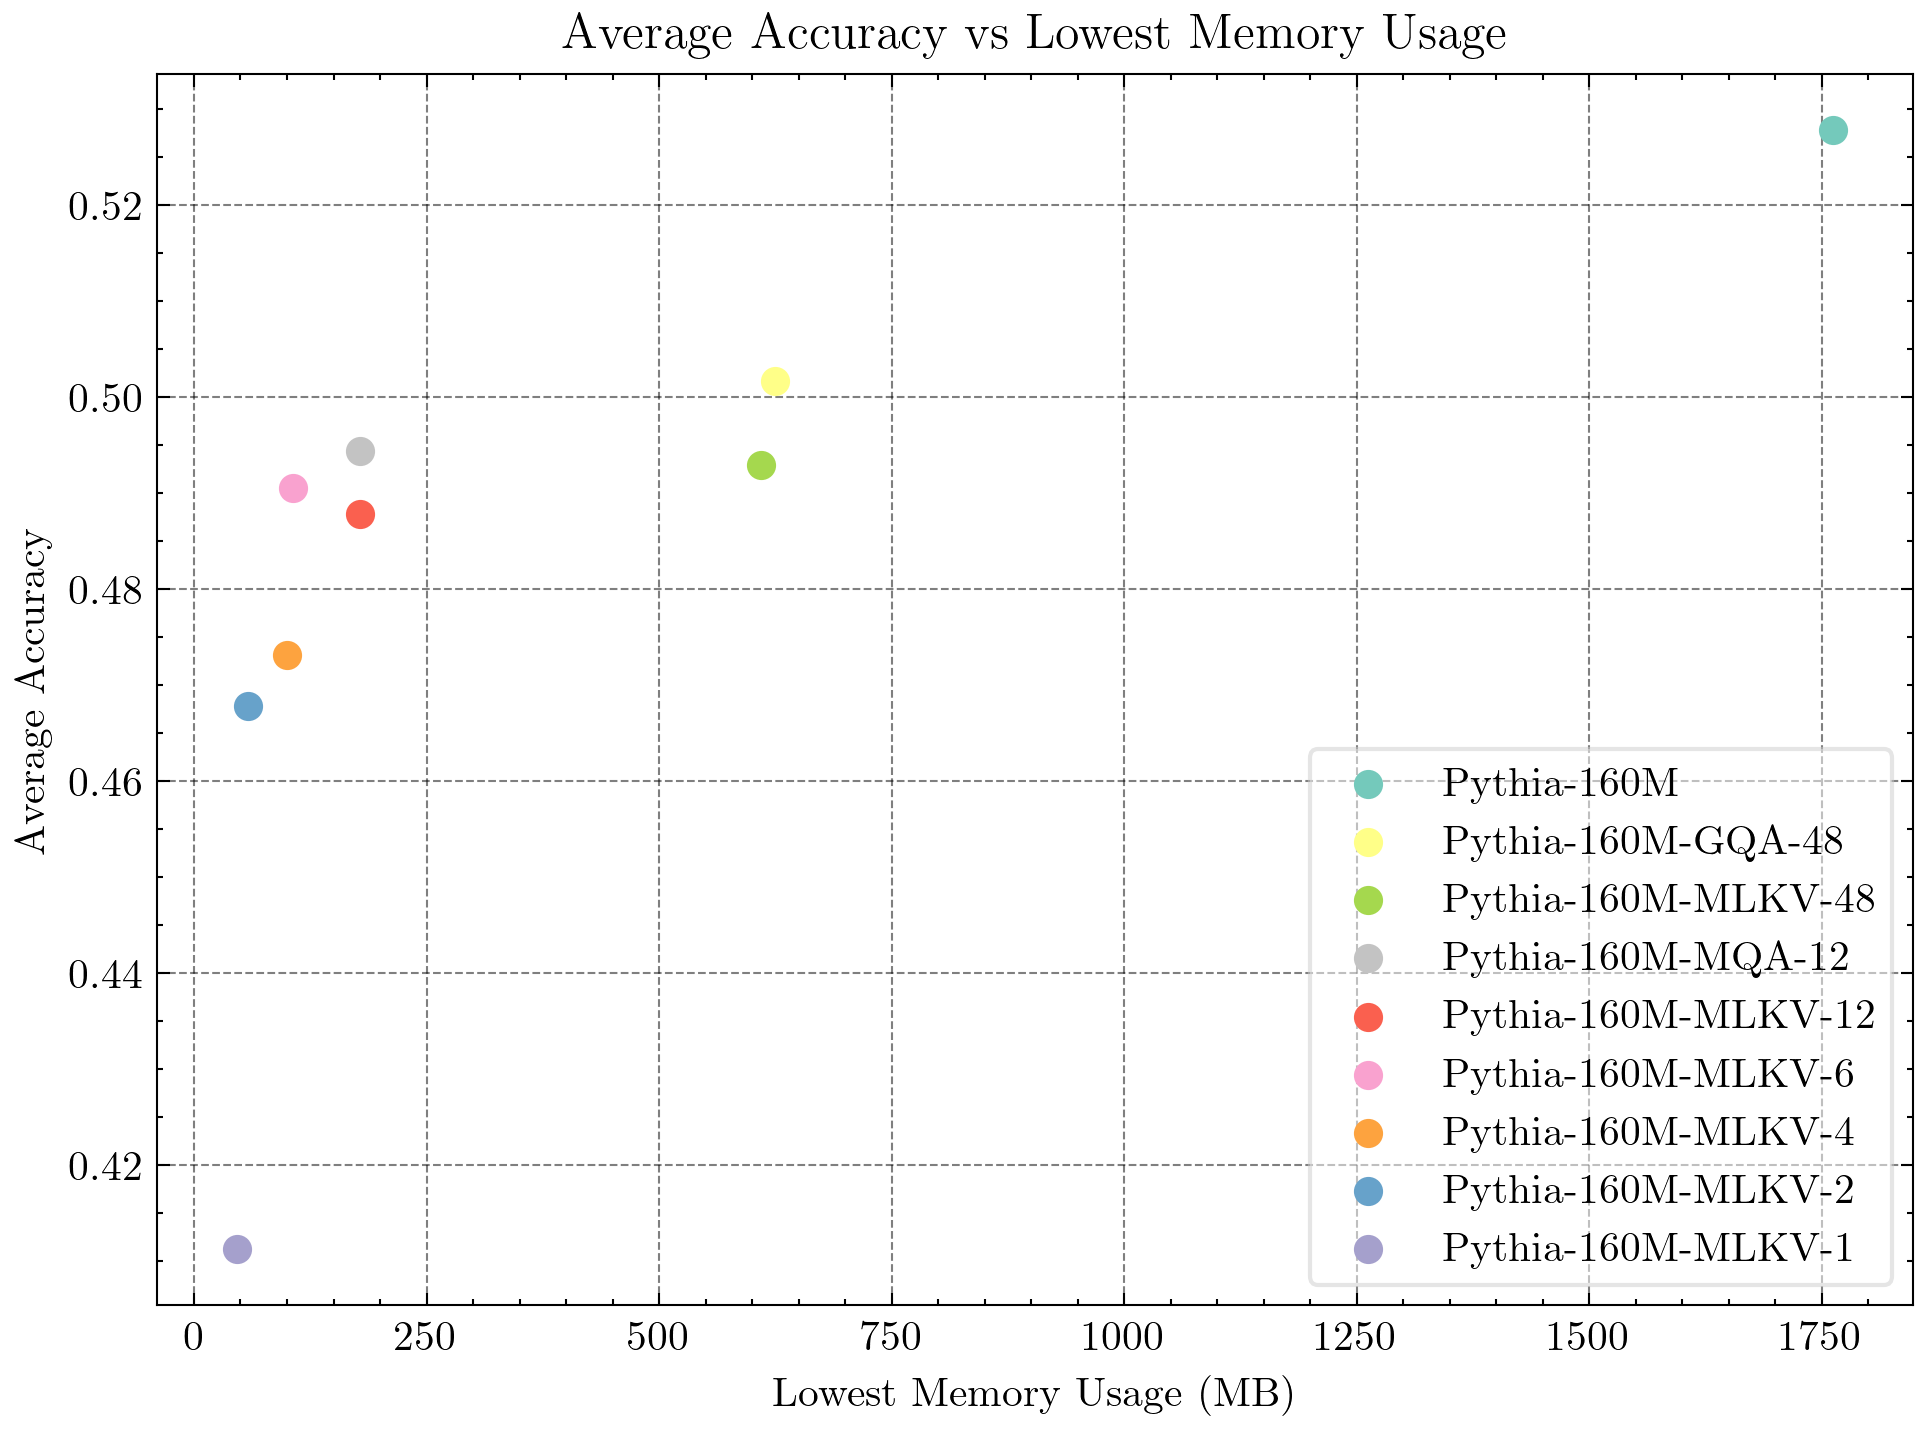

In [78]:
# Plot lowest memory usage on x axis vs average accuracy on y axis
fig, ax = plt.subplots(figsize=(width/1.5, height/1.5), dpi=dpi)
for model, group in cleaned_measurements.groupby('model'):
    min_mem = group['memory_usage'].min()
    acc = eval_df[eval_df['model'] == model]['average_acc'].values[0]
    ax.scatter(min_mem, acc, label=model)
    # At each point, write the accuracy/memory ratio
    # r = acc/(min_mem/1000)
    # ax.text(min_mem, acc, f"{r:.1f}", fontsize=8, ha='right')
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: list(model_files.keys()).index(t[0])))
ax.legend(handles, labels, framealpha=0.5)
ax.set_ylabel('Average Accuracy')
ax.set_xlabel('Lowest Memory Usage (MB)')
ax.set_title('Average Accuracy vs Lowest Memory Usage')
plt.tight_layout()
plt.savefig('figs/accuracy_vs_memory.png')
plt.show()

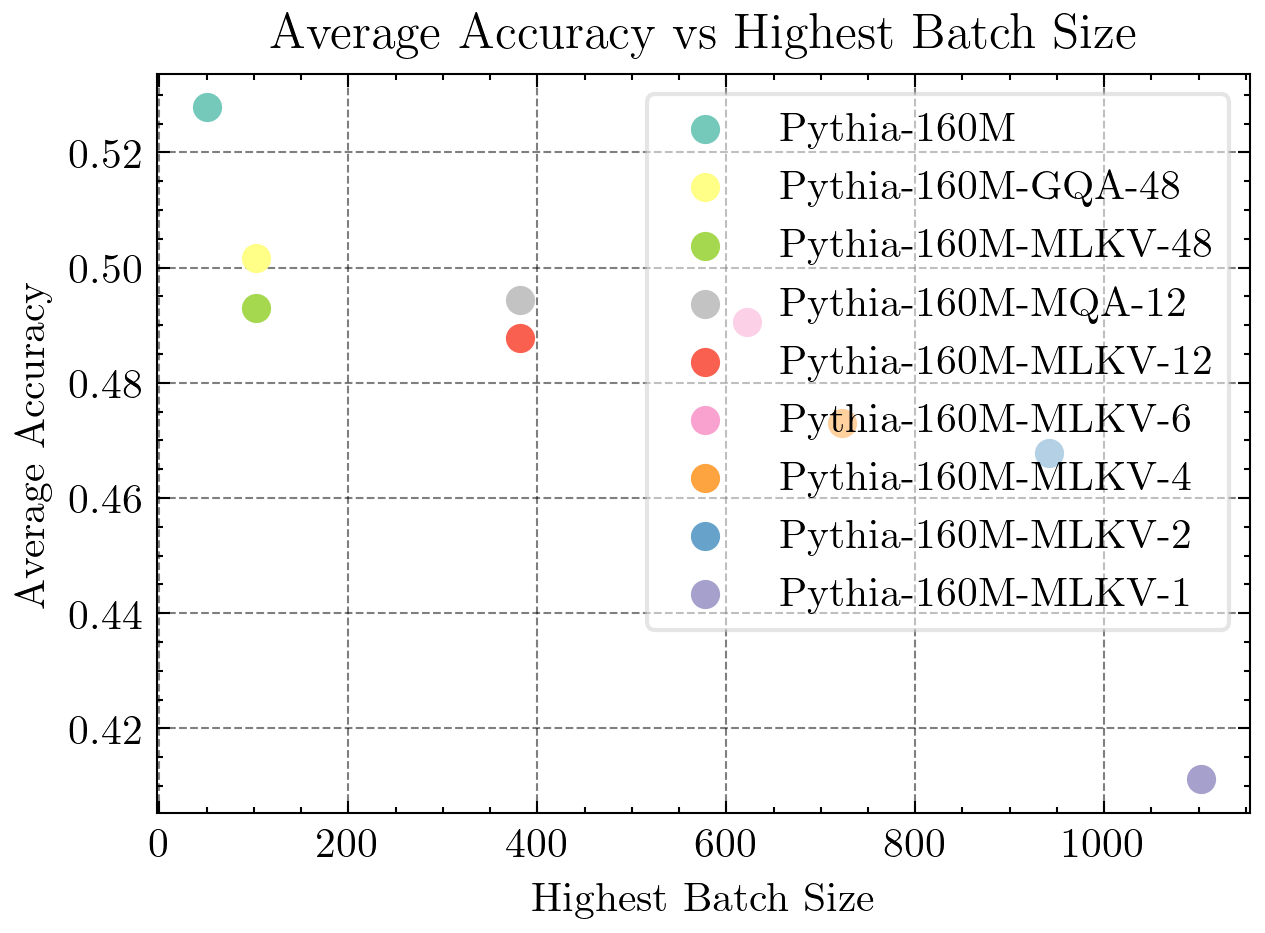

In [66]:
# Plot highest batch size on x axis vs average accuracy on y axis
fig, ax = plt.subplots(figsize=(width/1.5, height/1.5), dpi=dpi)
for model, group in cleaned_measurements.groupby('model'):
    max_batch = group['batch_size'].max()
    acc = eval_df[eval_df['model'] == model]['average_acc'].values[0]
    ax.scatter(max_batch, acc, label=model)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: list(model_files.keys()).index(t[0])))
ax.legend(handles, labels, framealpha=0.5)
ax.set_ylabel('Average Accuracy')
ax.set_xlabel('Highest Batch Size')
ax.set_title('Average Accuracy vs Highest Batch Size')
plt.tight_layout()
# plt.savefig('accuracy_vs_batch.png')
plt.show()

In [67]:
# We also exported the training loss graphs for each model (except base model) from wandb. We can plot them here
# Load parquet files of each model and combine them into one dataframe
# We take the train/loss and train/global_step columns from each of them. train/global_step becomes the index
# Pythia-160M-GQA-48 first
gqa_48 = pd.read_parquet('artifacts/gqa-48.parquet')
gqa_48 = gqa_48[['train/loss', 'train/global_step']]
gqa_48.set_index('train/global_step', inplace=True)
gqa_48.columns = ['Pythia-160M-GQA-48']
# Pythia-160M-MLKV-48
mlkv_48 = pd.read_parquet('artifacts/mlkv-48.parquet')
mlkv_48 = mlkv_48[['train/loss', 'train/global_step']]
mlkv_48.set_index('train/global_step', inplace=True)
mlkv_48.columns = ['Pythia-160M-MLKV-48']
# Pythia-160M-MQA-12, this one crashed before finishing, so there are 2 files where the second one continues off a checkpoint
# Need to align the global steps, then remove the overlapping part
mqa_12_1 = pd.read_parquet('artifacts/mqa-12-1.parquet')
mqa_12_1 = mqa_12_1[['train/loss', 'train/global_step']]
mqa_12_1.set_index('train/global_step', inplace=True)
mqa_12_1.columns = ['Pythia-160M-MQA-12']
mqa_12_2 = pd.read_parquet('artifacts/mqa-12-2.parquet')
mqa_12_2 = mqa_12_2[['train/loss', 'train/global_step']]
mqa_12_2.set_index('train/global_step', inplace=True)
mqa_12_2.columns = ['Pythia-160M-MQA-12']
# Merge them
mqa_12 = pd.concat([mqa_12_1, mqa_12_2])
mqa_12 = mqa_12[~mqa_12.index.duplicated(keep='first')]
# Pythia-160M-MLKV-12
mlkv_12 = pd.read_parquet('artifacts/mlkv-12.parquet')
mlkv_12 = mlkv_12[['train/loss', 'train/global_step']]
mlkv_12.set_index('train/global_step', inplace=True)
mlkv_12.columns = ['Pythia-160M-MLKV-12']
# Pythia-160M-MLKV-2
mlkv_2 = pd.read_parquet('artifacts/mlkv-2.parquet')
mlkv_2 = mlkv_2[['train/loss', 'train/global_step']]
mlkv_2.set_index('train/global_step', inplace=True)
mlkv_2.columns = ['Pythia-160M-MLKV-2']
# Merge them all
loss_df = pd.concat([gqa_48, mlkv_48, mqa_12, mlkv_12, mlkv_2], axis=1)
loss_df


,Pythia-160M-GQA-48,Pythia-160M-MLKV-48,Pythia-160M-MQA-12,Pythia-160M-MLKV-12,Pythia-160M-MLKV-2
train/global_step,,,,,
5.0,7.9432,8.6162,8.8086,27.3982,9.9567
10.0,7.9596,8.5575,8.7596,25.8051,9.2391
15.0,8.0317,8.5126,8.4715,23.8174,8.7262
20.0,8.1912,8.6361,8.5341,22.9190,8.7464
25.0,7.9030,8.4617,8.5359,22.8723,8.9205
...,...,...,...,...,...
102350.0,2.6690,2.7224,2.7096,2.7537,2.8485
102355.0,2.7574,2.8089,2.7967,2.8457,2.9318
102360.0,2.6670,2.7229,2.7064,2.7583,2.8500


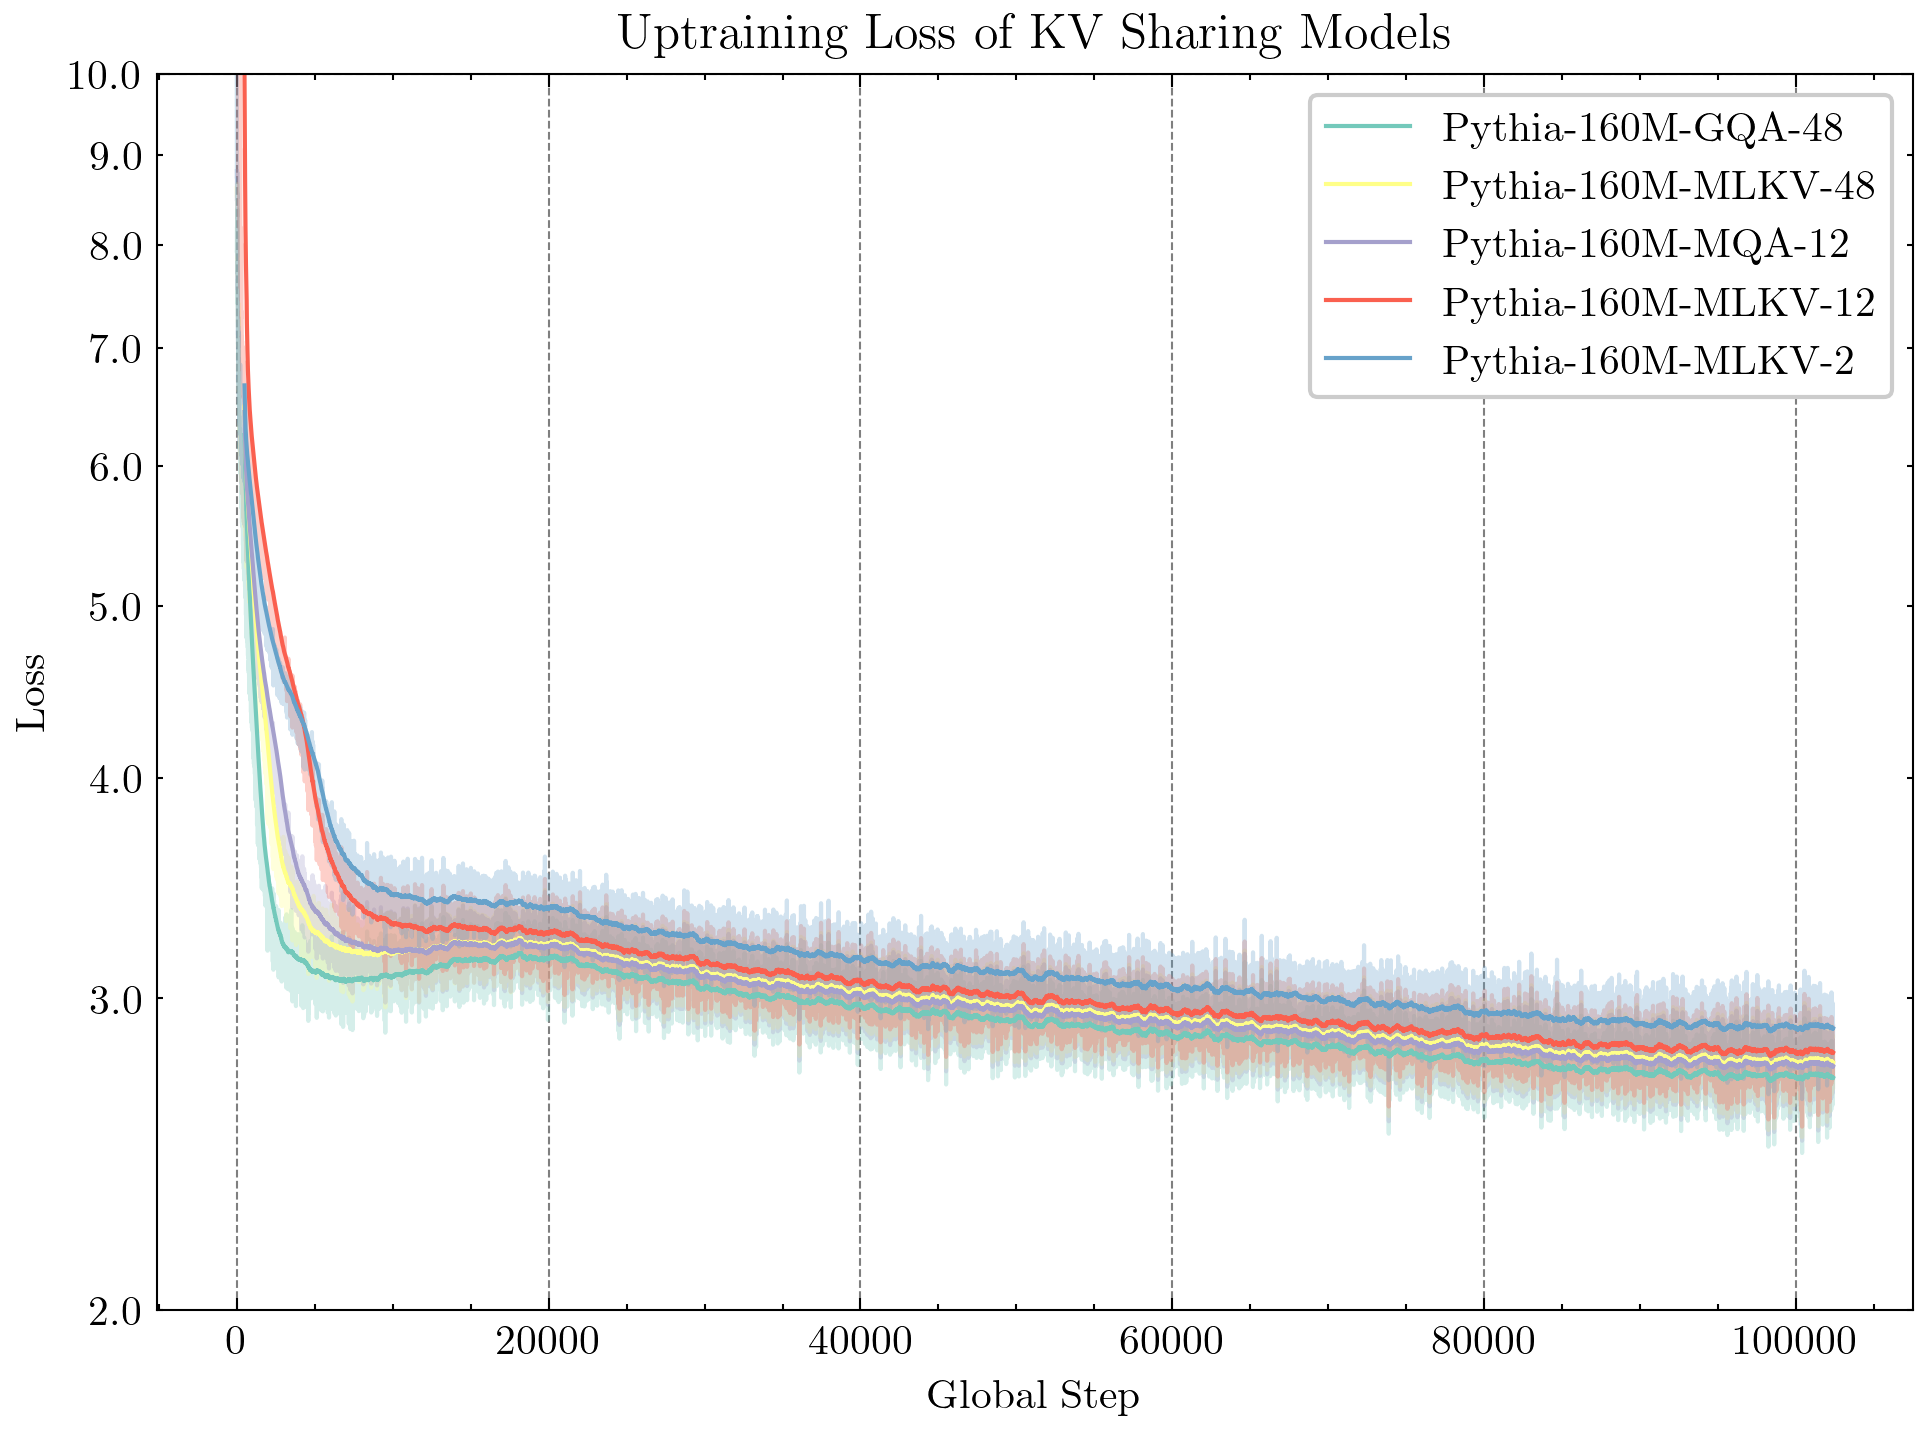

In [68]:
# Plot the training loss of each model
fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)
loss_df.plot(ax=ax, alpha=0.3)
# Loss is very noisy, so we want a smoothed version of it upfront, with the original data semi-transparent in the background. Match the colors of the lines
for i, model in enumerate(loss_df.columns):
    loss_df[model].rolling(window=100).mean().plot(ax=ax, color=ax.get_lines()[i].get_color())
# Set y-axis to log scale
ax.set_yscale('log')
# Add more labels in the y-axis for better readability. E.g. 1 to 10 
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
ax.get_yaxis().set_minor_formatter(plt.ScalarFormatter())
# Set max y-axis to 20
ax.set_ylim(2, 10)
ax.set_ylabel('Loss')
ax.set_xlabel('Global Step')
ax.set_title('Uptraining Loss of KV Sharing Models')
# Sort legends like in model_files
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: list(model_files.keys()).index(t[0])))
# Just include every second handle and label (smoothed lines)
handles = handles[1::2]
labels = labels[1::2]
ax.legend(handles, labels)
plt.tight_layout()
plt.savefig('figs/loss.jpg')
plt.show()